In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False     # 마이너스 부호 깨짐 방지

# 재시작: 정제된 구매데이터 불러오기

In [3]:
purchase_real = pd.read_csv('C:/cakd7/2차 프로젝트/MERGE_PURPRD_PRICE_2_DATA_TABLE.csv')
purchase_real

,CUSTNO,ASSO,RNO,BBCL,BCL,MCL,SCL,TYPE,PURYEAR,HALF_YEAR,QUARTER,PRICE_TYPE,PURAMT
0,17485,B,8919510,식품/생활,식품,샐러드채소,양상추,일용품,2015,4,3,저가,2000
1,17485,B,8919510,식품/생활,식품,김치채소,무우,일용품,2015,4,3,저가,1250
2,17485,B,8919510,식품/생활,식품,일반한우,한우양지,일용품,2015,4,3,고가,23790
3,17485,B,8919510,식품/생활,식품,포도,캠벨포도,일용품,2015,4,3,중가,25600
4,17485,B,8919510,식품/생활,식품,메론,머스크메론,일용품,2015,4,3,중가,12800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,5786,B,7784894,식품/생활,식품,스낵,일반스낵,일용품,2014,1,2,중가,490
28593026,14026,B,7784900,식품/생활,식품,족발,냉장족발,일용품,2014,1,2,중가,4000
28593027,16612,C,9500419,식품/생활,식품,기타축산,돼지양념육,일용품,2014,2,3,중가,7900
28593028,7565,C,10737145,식품/생활,식품,우유,일반우유,일용품,2014,2,4,저가,5200


## 유지고객 분류

In [15]:
purchase_real.head()

,CUSTNO,ASSO,RNO,BBCL,BCL,MCL,SCL,TYPE,PURYEAR,HALF_YEAR,QUARTER,PRICE_TYPE,PURAMT,Q_year
0,17485,B,8919510,식품/생활,식품,샐러드채소,양상추,일용품,2015,4,3,저가,2000,2015_3
1,17485,B,8919510,식품/생활,식품,김치채소,무우,일용품,2015,4,3,저가,1250,2015_3
2,17485,B,8919510,식품/생활,식품,일반한우,한우양지,일용품,2015,4,3,고가,23790,2015_3
3,17485,B,8919510,식품/생활,식품,포도,캠벨포도,일용품,2015,4,3,중가,25600,2015_3
4,17485,B,8919510,식품/생활,식품,메론,머스크메론,일용품,2015,4,3,중가,12800,2015_3


In [16]:
len(purchase_real)

28593030

In [4]:
cust_유지 = pd.pivot_table(data = purchase_real,
                           index = 'CUSTNO',
                           columns = ['PURYEAR', 'QUARTER'],
                           values = 'RNO',
                           aggfunc = 'count')
cust_유지

PURYEAR   2014                        2015                     
QUARTER      1      2      3      4      1      2      3      4
CUSTNO                                                         
1        121.0  117.0  142.0  214.0  172.0  140.0   73.0   78.0
2        184.0  155.0  139.0  132.0  145.0  116.0  126.0  119.0
3        139.0  209.0  246.0  145.0   87.0  133.0  139.0   93.0
4         93.0  177.0   85.0   87.0  122.0  141.0  118.0  107.0
5        184.0  193.0  110.0   20.0   93.0   30.0    NaN   89.0
...        ...    ...    ...    ...    ...    ...    ...    ...
19379      NaN    NaN   11.0   76.0  125.0  137.0  121.0  114.0
19380      NaN    NaN    NaN   17.0   62.0   41.0   52.0  268.0
19381      NaN    NaN    NaN    NaN  142.0  227.0  232.0  204.0
19382      NaN    NaN    NaN    NaN  174.0  224.0  231.0  277.0
19383      NaN    NaN    NaN    NaN    NaN    5.0  126.0  129.0

[19383 rows x 8 columns]

In [5]:
cust_유지.dropna(axis = 0)

PURYEAR   2014                        2015                     
QUARTER      1      2      3      4      1      2      3      4
CUSTNO                                                         
1        121.0  117.0  142.0  214.0  172.0  140.0   73.0   78.0
2        184.0  155.0  139.0  132.0  145.0  116.0  126.0  119.0
3        139.0  209.0  246.0  145.0   87.0  133.0  139.0   93.0
4         93.0  177.0   85.0   87.0  122.0  141.0  118.0  107.0
6        192.0  192.0  178.0  187.0  237.0  160.0  228.0  219.0
...        ...    ...    ...    ...    ...    ...    ...    ...
19333    111.0  170.0   90.0  107.0  132.0   81.0   43.0   90.0
19334    132.0  497.0  495.0  355.0  235.0  170.0   32.0   48.0
19335     95.0  295.0  274.0  256.0  279.0  235.0  209.0  230.0
19336      8.0   78.0   80.0   76.0   63.0   33.0   51.0   51.0
19337      7.0   21.0  193.0  169.0  141.0  219.0  304.0  267.0

[18866 rows x 8 columns]

In [18]:
idx_유지 = cust_유지.dropna(axis = 0).index
idx_유지

Int64Index([    1,     2,     3,     4,     6,     7,     8,     9,    10,
               11,
            ...
            19328, 19329, 19330, 19331, 19332, 19333, 19334, 19335, 19336,
            19337],
           dtype='int64', name='CUSTNO', length=18866)

In [19]:
purchase_유지 = purchase_real[purchase_real['CUSTNO'].isin(idx_유지)]
purchase_유지 

,CUSTNO,ASSO,RNO,BBCL,BCL,MCL,SCL,TYPE,PURYEAR,HALF_YEAR,QUARTER,PRICE_TYPE,PURAMT,Q_year
0,17485,B,8919510,식품/생활,식품,샐러드채소,양상추,일용품,2015,4,3,저가,2000,2015_3
1,17485,B,8919510,식품/생활,식품,김치채소,무우,일용품,2015,4,3,저가,1250,2015_3
2,17485,B,8919510,식품/생활,식품,일반한우,한우양지,일용품,2015,4,3,고가,23790,2015_3
3,17485,B,8919510,식품/생활,식품,포도,캠벨포도,일용품,2015,4,3,중가,25600,2015_3
4,17485,B,8919510,식품/생활,식품,메론,머스크메론,일용품,2015,4,3,중가,12800,2015_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593024,16515,B,7784996,식품/생활,식품,족발,즉석족발,일용품,2014,1,2,중가,4979,2014_2
28593025,5786,B,7784894,식품/생활,식품,스낵,일반스낵,일용품,2014,1,2,중가,490,2014_2
28593026,14026,B,7784900,식품/생활,식품,족발,냉장족발,일용품,2014,1,2,중가,4000,2014_2
28593027,16612,C,9500419,식품/생활,식품,기타축산,돼지양념육,일용품,2014,2,3,중가,7900,2014_3


## 카테고리 가중치 계산

In [20]:
category_sum = pd.pivot_table(data = purchase_유지,
                               index = ['BBCL'],
                               columns = ['PURYEAR', 'QUARTER'],
                               values = ['PURAMT'],
                               aggfunc = 'sum')
category_sum

PURAMT                                                      \
PURYEAR             2014                                                2015   
QUARTER                1            2            3            4            1   
BBCL                                                                           
가구인테리어/잡화    12793337996  14248503000  12907656420  17935715680  14620753780   
가전/레저취미/멀티샵   7696893420   9103224510   7137559410  10468393950   7866550399   
교육문화/아동       2669314710   2876933455   2510325650   3496103031   2932233482   
식품/생활        23585081099  22791291174  25198028033  22686448471  25258230990   
의류/이미용       27397021458  26934670193  22872190565  36724315925  29195916129   
침구/주방         3301991050   4013359522   3519002771   4023217175   3360756725   

                                                    
PURYEAR                                             
QUARTER                2            3            4  
BBCL                                                
가구인테리어/잡화    16546938432  14395137922  19099339590  
가전/레저취미/멀티샵   8720896521   7460668346  10959453759  
교육문화/아동       2943134445   2522876050   3389468990  
식품/생활        23022337673  26364027891  22533598244  
의류/이미용       28370761620  23727095859  36488401680  
침구/주방         3937420835   3466805599   4351742969

In [21]:
cate_sum_2014 = category_sum.iloc[:,:4]
cate_sum_2014.columns = [1,2,3,4]
cate_sum_2014

,1,2,3,4
BBCL,,,,
가구인테리어/잡화,12793337996,14248503000,12907656420,17935715680
가전/레저취미/멀티샵,7696893420,9103224510,7137559410,10468393950
교육문화/아동,2669314710,2876933455,2510325650,3496103031
식품/생활,23585081099,22791291174,25198028033,22686448471
의류/이미용,27397021458,26934670193,22872190565,36724315925
침구/주방,3301991050,4013359522,3519002771,4023217175


In [22]:
cate_sum_2015 = category_sum.iloc[:,4:]
cate_sum_2015.columns = [1,2,3,4]
cate_sum_2015

,1,2,3,4
BBCL,,,,
가구인테리어/잡화,14620753780,16546938432,14395137922,19099339590
가전/레저취미/멀티샵,7866550399,8720896521,7460668346,10959453759
교육문화/아동,2932233482,2943134445,2522876050,3389468990
식품/생활,25258230990,23022337673,26364027891,22533598244
의류/이미용,29195916129,28370761620,23727095859,36488401680
침구/주방,3360756725,3937420835,3466805599,4351742969


### 분기별/카테고리별 평균값

In [23]:
pd.options.display.float_format = '{:.1f}'.format
q_cate_mean_df = (cate_sum_2014 + cate_sum_2015)/2
q_cate_mean_df

,1,2,3,4
BBCL,,,,
가구인테리어/잡화,13707045888.0,15397720716.0,13651397171.0,18517527635.0
가전/레저취미/멀티샵,7781721909.5,8912060515.5,7299113878.0,10713923854.5
교육문화/아동,2800774096.0,2910033950.0,2516600850.0,3442786010.5
식품/생활,24421656044.5,22906814423.5,25781027962.0,22610023357.5
의류/이미용,28296468793.5,27652715906.5,23299643212.0,36606358802.5
침구/주방,3331373887.5,3975390178.5,3492904185.0,4187480072.0


### 연도별/카테고리별 평균값

In [24]:
category_sum_all = pd.pivot_table(data = purchase_유지,
                                   index = ['BBCL'],
                                   columns = ['PURYEAR'],
                                   values = ['PURAMT'],
                                   aggfunc = 'sum')
category_sum_all

PURAMT              
PURYEAR              2014          2015
BBCL                                   
가구인테리어/잡화     57885213096   64662169724
가전/레저취미/멀티샵   34406071290   35007569025
교육문화/아동       11552676846   11787712967
식품/생활         94260848777   97178194798
의류/이미용       113928198141  117782175288
침구/주방         14857570518   15116726128

In [25]:
y_cate_mean_df = pd.DataFrame(((cate_sum_2014 + cate_sum_2015)/2).mean(axis = 1))
y_cate_mean_df

,0
BBCL,
가구인테리어/잡화,15318422852.5
가전/레저취미/멀티샵,8676705039.4
교육문화/아동,2917548726.6
식품/생활,23929880446.9
의류/이미용,28963796678.6
침구/주방,3746787080.8


In [26]:
q_cate_mean_df

,1,2,3,4
BBCL,,,,
가구인테리어/잡화,13707045888.0,15397720716.0,13651397171.0,18517527635.0
가전/레저취미/멀티샵,7781721909.5,8912060515.5,7299113878.0,10713923854.5
교육문화/아동,2800774096.0,2910033950.0,2516600850.0,3442786010.5
식품/생활,24421656044.5,22906814423.5,25781027962.0,22610023357.5
의류/이미용,28296468793.5,27652715906.5,23299643212.0,36606358802.5
침구/주방,3331373887.5,3975390178.5,3492904185.0,4187480072.0


In [27]:
13707045888.0/15318422852.5

0.8948079067919829

In [28]:
pd.options.display.float_format = '{:.4f}'.format

q_cate_mean_df.apply(lambda x: x/y_cate_mean_df[0])

,1,2,3,4
BBCL,,,,
가구인테리어/잡화,0.8948,1.0052,0.8912,1.2088
가전/레저취미/멀티샵,0.8969,1.0271,0.8412,1.2348
교육문화/아동,0.9600,0.9974,0.8626,1.1800
식품/생활,1.0206,0.9572,1.0774,0.9448
의류/이미용,0.9770,0.9547,0.8044,1.2639
침구/주방,0.8891,1.0610,0.9322,1.1176


### 가중치 계산

In [29]:
cate_weight = 1/q_cate_mean_df.apply(lambda x: x/y_cate_mean_df[0])
cate_weight

,1,2,3,4
BBCL,,,,
가구인테리어/잡화,1.1176,0.9949,1.1221,0.8272
가전/레저취미/멀티샵,1.1150,0.9736,1.1887,0.8099
교육문화/아동,1.0417,1.0026,1.1593,0.8474
식품/생활,0.9799,1.0447,0.9282,1.0584
의류/이미용,1.0236,1.0474,1.2431,0.7912
침구/주방,1.1247,0.9425,1.0727,0.8948


#### 확인

In [30]:
q_cate_mean_df * cate_weight

,1,2,3,4
BBCL,,,,
가구인테리어/잡화,15318422852.5000,15318422852.5000,15318422852.5000,15318422852.5000
가전/레저취미/멀티샵,8676705039.3750,8676705039.3750,8676705039.3750,8676705039.3750
교육문화/아동,2917548726.6250,2917548726.6250,2917548726.6250,2917548726.6250
식품/생활,23929880446.8750,23929880446.8750,23929880446.8750,23929880446.8750
의류/이미용,28963796678.6250,28963796678.6250,28963796678.6250,28963796678.6250
침구/주방,3746787080.7500,3746787080.7500,3746787080.7500,3746787080.7500


## 카테고리/금액 타입 가중치 계산

In [31]:
category_price_type_sum = pd.pivot_table(data = purchase_유지,
                               index = ['BBCL','PRICE_TYPE'],
                               columns = ['PURYEAR', 'QUARTER'],
                               values = ['PURAMT'],
                               aggfunc = 'sum')
category_price_type_sum

PURAMT                                         \
PURYEAR                        2014                                          
QUARTER                           1            2            3            4   
BBCL        PRICE_TYPE                                                       
가구인테리어/잡화   고가           8460202350   9246488790   8329682030  12018291530   
            저가           1325827426   1283622310   1242585400   1796935120   
            중가           3007308220   3718391900   3335388990   4120489030   
가전/레저취미/멀티샵 고가           3482369570   4278621670   3559997420   4954139610   
            저가            375849550    389429950    398868560    437222980   
            중가           3838674300   4435172890   3178693430   5077031360   
교육문화/아동     고가            128048440    111849410    114853920    286563110   
            저가            238378505    213119600    217817314    258182060   
            중가           2302887765   2551964445   2177654416   2951357861   
식품/생활       고가           7314973493   6069735494   7696666422   6034805125   
            저가           2682456348   2814542991   2954196464   3155445076   
            중가          13587651258  13907012689  14547165147  13496198270   
의류/이미용      고가           7952757820   7750780830   6918048460  10159023780   
            저가           1554404357   1748582553   1664080037   2167836535   
            중가          17889859281  17435306810  14290062068  24397455610   
침구/주방       고가           2134066800   2831586240   2348509850   2767335270   
            저가            350020230    342485552    385170430    275298605   
            중가            817904020    839287730    785322491    980583300   

                                                                            
PURYEAR                        2015                                         
QUARTER                           1            2            3            4  
BBCL        PRICE_TYPE                                                      
가구인테리어/잡화   고가          10161274860  11638442320  10363698150  14191272830  
            저가           1265467040   1162947682   1043377412   1640234640  
            중가           3194011880   3745548430   2988062360   3267832120  
가전/레저취미/멀티샵 고가           3709270820   4394685920   3946587400   5694390220  
            저가            329183159    381398481    339710466    345062569  
            중가           3828096420   3944812120   3174370480   4920000970  
교육문화/아동     고가            243824379    267408040    251630040    328112250  
            저가            237359053    212146410    206149140    199564270  
            중가           2451050050   2463579995   2065096870   2861792470  
식품/생활       고가           7667326704   5825260481   8169765101   6721091527  
            저가           3243744771   3337585054   3336642525   2997965627  
            중가          14347159515  13859492138  14857620265  12814541090  
의류/이미용      고가           8295847950   7632795740   6899187050   9713149180  
            저가           1919385949   1932010630   1848964589   1939960030  
            중가          18980682230  18805955250  14978944220  24835292470  
침구/주방       고가           2256567240   2776145470   2366162620   3139145350  
            저가            244343140    234485655    248286719    221545729  
            중가            859846345    926789710    852356260    991051890

In [32]:
category_price_type_sum_2014 = category_price_type_sum.iloc[:,:4]
category_price_type_sum_2014.columns = [1,2,3,4]
category_price_type_sum_2014

1            2            3            4
BBCL        PRICE_TYPE                                                    
가구인테리어/잡화   고가           8460202350   9246488790   8329682030  12018291530
            저가           1325827426   1283622310   1242585400   1796935120
            중가           3007308220   3718391900   3335388990   4120489030
가전/레저취미/멀티샵 고가           3482369570   4278621670   3559997420   4954139610
            저가            375849550    389429950    398868560    437222980
            중가           3838674300   4435172890   3178693430   5077031360
교육문화/아동     고가            128048440    111849410    114853920    286563110
            저가            238378505    213119600    217817314    258182060
            중가           2302887765   2551964445   2177654416   2951357861
식품/생활       고가           7314973493   6069735494   7696666422   6034805125
            저가           2682456348   2814542991   2954196464   3155445076
            중가          13587651258  13907012689  14547165147  13496198270
의류/이미용      고가           7952757820   7750780830   6918048460  10159023780
            저가           1554404357   1748582553   1664080037   2167836535
            중가          17889859281  17435306810  14290062068  24397455610
침구/주방       고가           2134066800   2831586240   2348509850   2767335270
            저가            350020230    342485552    385170430    275298605
            중가            817904020    839287730    785322491    980583300

In [33]:
category_price_type_sum_2015 = category_price_type_sum.iloc[:,4:]
category_price_type_sum_2015.columns = [1,2,3,4]
category_price_type_sum_2015

1            2            3            4
BBCL        PRICE_TYPE                                                    
가구인테리어/잡화   고가          10161274860  11638442320  10363698150  14191272830
            저가           1265467040   1162947682   1043377412   1640234640
            중가           3194011880   3745548430   2988062360   3267832120
가전/레저취미/멀티샵 고가           3709270820   4394685920   3946587400   5694390220
            저가            329183159    381398481    339710466    345062569
            중가           3828096420   3944812120   3174370480   4920000970
교육문화/아동     고가            243824379    267408040    251630040    328112250
            저가            237359053    212146410    206149140    199564270
            중가           2451050050   2463579995   2065096870   2861792470
식품/생활       고가           7667326704   5825260481   8169765101   6721091527
            저가           3243744771   3337585054   3336642525   2997965627
            중가          14347159515  13859492138  14857620265  12814541090
의류/이미용      고가           8295847950   7632795740   6899187050   9713149180
            저가           1919385949   1932010630   1848964589   1939960030
            중가          18980682230  18805955250  14978944220  24835292470
침구/주방       고가           2256567240   2776145470   2366162620   3139145350
            저가            244343140    234485655    248286719    221545729
            중가            859846345    926789710    852356260    991051890

### 분기별/카테고리별/금액 타입 평균값

In [34]:
pd.options.display.float_format = '{:.1f}'.format
q_cate_type_mean_df = (category_price_type_sum_2014 + category_price_type_sum_2015)/2
q_cate_type_mean_df

1             2             3             4
BBCL        PRICE_TYPE                                                        
가구인테리어/잡화   고가          9310738605.0 10442465555.0  9346690090.0 13104782180.0
            저가          1295647233.0  1223284996.0  1142981406.0  1718584880.0
            중가          3100660050.0  3731970165.0  3161725675.0  3694160575.0
가전/레저취미/멀티샵 고가          3595820195.0  4336653795.0  3753292410.0  5324264915.0
            저가           352516354.5   385414215.5   369289513.0   391142774.5
            중가          3833385360.0  4189992505.0  3176531955.0  4998516165.0
교육문화/아동     고가           185936409.5   189628725.0   183241980.0   307337680.0
            저가           237868779.0   212633005.0   211983227.0   228873165.0
            중가          2376968907.5  2507772220.0  2121375643.0  2906575165.5
식품/생활       고가          7491150098.5  5947497987.5  7933215761.5  6377948326.0
            저가          2963100559.5  3076064022.5  3145419494.5  3076705351.5
            중가         13967405386.5 13883252413.5 14702392706.0 13155369680.0
의류/이미용      고가          8124302885.0  7691788285.0  6908617755.0  9936086480.0
            저가          1736895153.0  1840296591.5  1756522313.0  2053898282.5
            중가         18435270755.5 18120631030.0 14634503144.0 24616374040.0
침구/주방       고가          2195317020.0  2803865855.0  2357336235.0  2953240310.0
            저가           297181685.0   288485603.5   316728574.5   248422167.0
            중가           838875182.5   883038720.0   818839375.5   985817595.0

### 연도별/카테고리별 평균값

In [35]:
category_price_type_sum_all = pd.pivot_table(data = purchase_유지,
                                   index = ['BBCL','PRICE_TYPE'],
                                   columns = ['PURYEAR'],
                                   values = ['PURAMT'],
                                   aggfunc = 'sum')
category_price_type_sum_all

PURAMT             
PURYEAR                        2014         2015
BBCL        PRICE_TYPE                          
가구인테리어/잡화   고가          38054664700  46354688160
            저가           5648970256   5112026774
            중가          14181578140  13195454790
가전/레저취미/멀티샵 고가          16275128270  17744934360
            저가           1601371040   1395354675
            중가          16529571980  15867279990
교육문화/아동     고가            641314880   1090974709
            저가            927497479    855218873
            중가           9983864487   9841519385
식품/생활       고가          27116180534  28383443813
            저가          11606640879  12915937977
            중가          55538027364  55878813008
의류/이미용      고가          32780610890  32540979920
            저가           7134903482   7640321198
            중가          74012683769  77600874170
침구/주방       고가          10081498160  10538020680
            저가           1352974817    948661243
            중가           3423097541   3630044205

In [36]:
y_cate_type_mean_df = pd.DataFrame((category_price_type_sum_all.iloc[:,0] + category_price_type_sum_all.iloc[:,1])/8)
y_cate_type_mean_df

0
BBCL        PRICE_TYPE              
가구인테리어/잡화   고가         10551169107.5
            저가          1345124628.8
            중가          3422129116.2
가전/레저취미/멀티샵 고가          4252507828.8
            저가           374590714.4
            중가          4049606496.2
교육문화/아동     고가           216536198.6
            저가           222839544.0
            중가          2478172984.0
식품/생활       고가          6937453043.4
            저가          3065322357.0
            중가         13927105046.5
의류/이미용      고가          8165198851.2
            저가          1846903085.0
            중가         18951694742.4
침구/주방       고가          2577439855.0
            저가           287704507.5
            중가           881642718.2

In [37]:
q_cate_type_mean_df

1             2             3             4
BBCL        PRICE_TYPE                                                        
가구인테리어/잡화   고가          9310738605.0 10442465555.0  9346690090.0 13104782180.0
            저가          1295647233.0  1223284996.0  1142981406.0  1718584880.0
            중가          3100660050.0  3731970165.0  3161725675.0  3694160575.0
가전/레저취미/멀티샵 고가          3595820195.0  4336653795.0  3753292410.0  5324264915.0
            저가           352516354.5   385414215.5   369289513.0   391142774.5
            중가          3833385360.0  4189992505.0  3176531955.0  4998516165.0
교육문화/아동     고가           185936409.5   189628725.0   183241980.0   307337680.0
            저가           237868779.0   212633005.0   211983227.0   228873165.0
            중가          2376968907.5  2507772220.0  2121375643.0  2906575165.5
식품/생활       고가          7491150098.5  5947497987.5  7933215761.5  6377948326.0
            저가          2963100559.5  3076064022.5  3145419494.5  3076705351.5
            중가         13967405386.5 13883252413.5 14702392706.0 13155369680.0
의류/이미용      고가          8124302885.0  7691788285.0  6908617755.0  9936086480.0
            저가          1736895153.0  1840296591.5  1756522313.0  2053898282.5
            중가         18435270755.5 18120631030.0 14634503144.0 24616374040.0
침구/주방       고가          2195317020.0  2803865855.0  2357336235.0  2953240310.0
            저가           297181685.0   288485603.5   316728574.5   248422167.0
            중가           838875182.5   883038720.0   818839375.5   985817595.0

In [38]:
13707045888.0/15318422852.5

0.8948079067919829

In [39]:
pd.options.display.float_format = '{:.4f}'.format

q_cate_type_mean_df.apply(lambda x: x/y_cate_type_mean_df[0])

1      2      3      4
BBCL        PRICE_TYPE                            
가구인테리어/잡화   고가         0.8824 0.9897 0.8858 1.2420
            저가         0.9632 0.9094 0.8497 1.2776
            중가         0.9061 1.0905 0.9239 1.0795
가전/레저취미/멀티샵 고가         0.8456 1.0198 0.8826 1.2520
            저가         0.9411 1.0289 0.9858 1.0442
            중가         0.9466 1.0347 0.7844 1.2343
교육문화/아동     고가         0.8587 0.8757 0.8462 1.4193
            저가         1.0674 0.9542 0.9513 1.0271
            중가         0.9592 1.0119 0.8560 1.1729
식품/생활       고가         1.0798 0.8573 1.1435 0.9194
            저가         0.9667 1.0035 1.0261 1.0037
            중가         1.0029 0.9969 1.0557 0.9446
의류/이미용      고가         0.9950 0.9420 0.8461 1.2169
            저가         0.9404 0.9964 0.9511 1.1121
            중가         0.9728 0.9561 0.7722 1.2989
침구/주방       고가         0.8517 1.0878 0.9146 1.1458
            저가         1.0329 1.0027 1.1009 0.8635
            중가         0.9515 1.0016 0.9288 1.1182

### 가중치 계산

In [40]:
cate_type_weight = 1/q_cate_type_mean_df.apply(lambda x: x/y_cate_type_mean_df[0])
cate_type_weight

1      2      3      4
BBCL        PRICE_TYPE                            
가구인테리어/잡화   고가         1.1332 1.0104 1.1289 0.8051
            저가         1.0382 1.0996 1.1769 0.7827
            중가         1.1037 0.9170 1.0824 0.9264
가전/레저취미/멀티샵 고가         1.1826 0.9806 1.1330 0.7987
            저가         1.0626 0.9719 1.0144 0.9577
            중가         1.0564 0.9665 1.2749 0.8102
교육문화/아동     고가         1.1646 1.1419 1.1817 0.7046
            저가         0.9368 1.0480 1.0512 0.9736
            중가         1.0426 0.9882 1.1682 0.8526
식품/생활       고가         0.9261 1.1664 0.8745 1.0877
            저가         1.0345 0.9965 0.9745 0.9963
            중가         0.9971 1.0032 0.9473 1.0587
의류/이미용      고가         1.0050 1.0615 1.1819 0.8218
            저가         1.0633 1.0036 1.0515 0.8992
            중가         1.0280 1.0459 1.2950 0.7699
침구/주방       고가         1.1741 0.9192 1.0934 0.8727
            저가         0.9681 0.9973 0.9084 1.1581
            중가         1.0510 0.9984 1.0767 0.8943

#### 확인

In [41]:
q_cate_type_mean_df * cate_type_weight

1                2                3  \
BBCL        PRICE_TYPE                                                      
가구인테리어/잡화   고가         10551169107.5000 10551169107.5000 10551169107.5000   
            저가          1345124628.7500  1345124628.7500  1345124628.7500   
            중가          3422129116.2500  3422129116.2500  3422129116.2500   
가전/레저취미/멀티샵 고가          4252507828.7500  4252507828.7500  4252507828.7500   
            저가           374590714.3750   374590714.3750   374590714.3750   
            중가          4049606496.2500  4049606496.2500  4049606496.2500   
교육문화/아동     고가           216536198.6250   216536198.6250   216536198.6250   
            저가           222839544.0000   222839544.0000   222839544.0000   
            중가          2478172984.0000  2478172984.0000  2478172984.0000   
식품/생활       고가          6937453043.3750  6937453043.3750  6937453043.3750   
            저가          3065322357.0000  3065322357.0000  3065322357.0000   
            중가         13927105046.5000 13927105046.5000 13927105046.5000   
의류/이미용      고가          8165198851.2500  8165198851.2500  8165198851.2500   
            저가          1846903085.0000  1846903085.0000  1846903085.0000   
            중가         18951694742.3750 18951694742.3750 18951694742.3750   
침구/주방       고가          2577439855.0000  2577439855.0000  2577439855.0000   
            저가           287704507.5000   287704507.5000   287704507.5000   
            중가           881642718.2500   881642718.2500   881642718.2500   

                                      4  
BBCL        PRICE_TYPE                   
가구인테리어/잡화   고가         10551169107.5000  
            저가          1345124628.7500  
            중가          3422129116.2500  
가전/레저취미/멀티샵 고가          4252507828.7500  
            저가           374590714.3750  
            중가          4049606496.2500  
교육문화/아동     고가           216536198.6250  
            저가           222839544.0000  
            중가          2478172984.0000  
식품/생활       고가          6937453043.3750  
            저가          3065322357.0000  
            중가         13927105046.5000  
의류/이미용      고가          8165198851.2500  
            저가          1846903085.0000  
            중가         18951694742.3750  
침구/주방       고가          2577439855.0000  
            저가           287704507.5000  
            중가           881642718.2500

### 유지고객 데이터 내 고객별/분기별/카테고리별/금액타입별로 나누기

In [42]:
def pivot(df, aggfunc):
    
    # 분기
    pivot_df_q_ = pd.pivot_table(df,
                               values = 'PURAMT',
                               index = 'CUSTNO',
                               columns = ['Q_year', 'BBCL', 'PRICE_TYPE'],
                               aggfunc = aggfunc)
    pivot_df_q_.fillna(0, inplace = True)
    # 컬럼 변경
    columns_name = []
    for indexs in pivot_df_q_.columns:
         columns_name.append('_'.join([aggfunc, '분기'] + [str(idx) for idx in indexs]))
    pivot_df_q_.columns = columns_name
    
    # 분기 총액
    pivot_df_label_q = pd.pivot_table(df,
                                values = 'PURAMT',
                                index = 'CUSTNO',
                                columns = ['Q_year'],
                                aggfunc = 'sum')
    pivot_df_label_q.fillna(0, inplace = True)
    
    return pivot_df_q_

In [43]:
df_sum = pivot(purchase_유지, 'sum')
df_sum

,sum_분기_2014_1_가구인테리어/잡화_고가,sum_분기_2014_1_가구인테리어/잡화_저가,sum_분기_2014_1_가구인테리어/잡화_중가,sum_분기_2014_1_가전/레저취미/멀티샵_고가,sum_분기_2014_1_가전/레저취미/멀티샵_저가,sum_분기_2014_1_가전/레저취미/멀티샵_중가,sum_분기_2014_1_교육문화/아동_고가,sum_분기_2014_1_교육문화/아동_저가,sum_분기_2014_1_교육문화/아동_중가,sum_분기_2014_1_식품/생활_고가,...,sum_분기_2015_4_교육문화/아동_중가,sum_분기_2015_4_식품/생활_고가,sum_분기_2015_4_식품/생활_저가,sum_분기_2015_4_식품/생활_중가,sum_분기_2015_4_의류/이미용_고가,sum_분기_2015_4_의류/이미용_저가,sum_분기_2015_4_의류/이미용_중가,sum_분기_2015_4_침구/주방_고가,sum_분기_2015_4_침구/주방_저가,sum_분기_2015_4_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,,,,
1,0.0000,390800.0000,0.0000,641250.0000,0.0000,65550.0000,0.0000,0.0000,103740.0000,1027500.0000,...,0.0000,237618.0000,5540.0000,346870.0000,133100.0000,0.0000,3415160.0000,137750.0000,0.0000,699200.0000
2,0.0000,562170.0000,150000.0000,2194330.0000,30500.0000,0.0000,0.0000,0.0000,113920.0000,519290.0000,...,0.0000,264720.0000,0.0000,1481370.0000,5896250.0000,0.0000,3002000.0000,0.0000,0.0000,432490.0000
3,0.0000,600.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,21800.0000,...,0.0000,0.0000,146169.0000,102132.0000,0.0000,7800.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,191810.0000,189520.0000,0.0000,0.0000,141550.0000,0.0000,0.0000,0.0000,8000.0000,...,0.0000,113357.0000,44688.0000,617760.0000,0.0000,90000.0000,565980.0000,0.0000,0.0000,54000.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,265680.0000,...,0.0000,329241.0000,134399.0000,705709.0000,975000.0000,157140.0000,645900.0000,0.0000,3800.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,22000.0000,0.0000,0.0000,3000.0000,22700.0000,34440.0000,...,0.0000,12300.0000,28650.0000,479480.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19334,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7000.0000,11250.0000,0.0000,...,119200.0000,7990.0000,52550.0000,66170.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19335,0.0000,25000.0000,0.0000,0.0000,0.0000,0.0000,82800.0000,28400.0000,103324.0000,72130.0000,...,684480.0000,38480.0000,99865.0000,829819.0000,0.0000,188500.0000,0.0000,0.0000,6000.0000,0.0000


In [48]:
df_sum_q1 = df_sum.iloc[:,:18]
df_sum_q1.columns = cate_type_weight_final.columns
df_sum_q1

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,390800.0000,0.0000,641250.0000,0.0000,65550.0000,0.0000,0.0000,103740.0000,1027500.0000,0.0000,759320.0000,2395640.0000,0.0000,3110080.0000,177650.0000,0.0000,470060.0000
2,0.0000,562170.0000,150000.0000,2194330.0000,30500.0000,0.0000,0.0000,0.0000,113920.0000,519290.0000,0.0000,2387950.0000,6630010.0000,0.0000,325500.0000,1073900.0000,0.0000,135900.0000
3,0.0000,600.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,21800.0000,179883.0000,100499.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,191810.0000,189520.0000,0.0000,0.0000,141550.0000,0.0000,0.0000,0.0000,8000.0000,6400.0000,593513.0000,33250.0000,18000.0000,79600.0000,0.0000,0.0000,48000.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,265680.0000,345298.0000,521018.0000,440000.0000,90600.0000,414700.0000,0.0000,53710.0000,35000.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,22000.0000,0.0000,0.0000,3000.0000,22700.0000,34440.0000,33580.0000,448510.0000,0.0000,0.0000,43000.0000,0.0000,5900.0000,0.0000
19334,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7000.0000,11250.0000,0.0000,63707.0000,707092.0000,0.0000,45000.0000,0.0000,0.0000,0.0000,0.0000
19335,0.0000,25000.0000,0.0000,0.0000,0.0000,0.0000,82800.0000,28400.0000,103324.0000,72130.0000,36230.0000,271420.0000,0.0000,45000.0000,0.0000,0.0000,273430.0000,0.0000


In [49]:
df_sum_q2 = df_sum.iloc[:,18:36]
df_sum_q2 

,sum_분기_2014_2_가구인테리어/잡화_고가,sum_분기_2014_2_가구인테리어/잡화_저가,sum_분기_2014_2_가구인테리어/잡화_중가,sum_분기_2014_2_가전/레저취미/멀티샵_고가,sum_분기_2014_2_가전/레저취미/멀티샵_저가,sum_분기_2014_2_가전/레저취미/멀티샵_중가,sum_분기_2014_2_교육문화/아동_고가,sum_분기_2014_2_교육문화/아동_저가,sum_분기_2014_2_교육문화/아동_중가,sum_분기_2014_2_식품/생활_고가,sum_분기_2014_2_식품/생활_저가,sum_분기_2014_2_식품/생활_중가,sum_분기_2014_2_의류/이미용_고가,sum_분기_2014_2_의류/이미용_저가,sum_분기_2014_2_의류/이미용_중가,sum_분기_2014_2_침구/주방_고가,sum_분기_2014_2_침구/주방_저가,sum_분기_2014_2_침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,361020.0000,1013850.0000,1436400.0000,0.0000,0.0000,0.0000,0.0000,73720.0000,2462585.0000,750.0000,519600.0000,1370900.0000,0.0000,3544940.0000,0.0000,0.0000,0.0000
2,0.0000,481270.0000,311690.0000,1510780.0000,0.0000,244650.0000,0.0000,0.0000,352460.0000,679510.0000,0.0000,1767280.0000,2720530.0000,0.0000,786340.0000,1229930.0000,0.0000,115320.0000
3,0.0000,1500.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,24470.0000,264843.0000,177620.0000,0.0000,0.0000,80000.0000,0.0000,0.0000,0.0000
4,0.0000,137200.0000,331000.0000,119000.0000,5200.0000,141550.0000,0.0000,0.0000,0.0000,65174.0000,63100.0000,907439.0000,737000.0000,15000.0000,1204800.0000,0.0000,6000.0000,0.0000
6,39000.0000,102000.0000,292800.0000,0.0000,14800.0000,0.0000,0.0000,0.0000,0.0000,204582.0000,229124.0000,670778.0000,359000.0000,121000.0000,930000.0000,105000.0000,47200.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,1500.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,25600.0000,109200.0000,29770.0000,747918.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19334,0.0000,0.0000,0.0000,0.0000,15900.0000,0.0000,0.0000,31750.0000,32780.0000,101103.0000,308308.0000,2137496.0000,0.0000,42980.0000,0.0000,0.0000,35600.0000,0.0000
19335,0.0000,57300.0000,0.0000,0.0000,82000.0000,62000.0000,73000.0000,314700.0000,206540.0000,362480.0000,162900.0000,841152.0000,0.0000,374410.0000,43200.0000,0.0000,156640.0000,46800.0000


### 가중치 곱해주기

In [50]:
cate_type_weight_reset_idx.columns

Index([1, 2, 3, 4, 'BBCL_PRICE_TYPE'], dtype='object')

In [51]:
cate_type_weight_reset_idx = cate_type_weight.reset_index()
cate_type_weight_reset_idx['BBCL_PRICE_TYPE'] = cate_type_weight_reset_idx['BBCL'] + '_' + cate_type_weight_reset_idx['PRICE_TYPE']
cate_type_weight_reset_idx.drop(columns = ['BBCL', 'PRICE_TYPE'], inplace = True)
cate_type_weight_final = cate_type_weight_reset_idx.set_index('BBCL_PRICE_TYPE').transpose()
cate_type_weight_final

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,1.1332,1.0382,1.1037,1.1826,1.0626,1.0564,1.1646,0.9368,1.0426,0.9261,1.0345,0.9971,1.0050,1.0633,1.0280,1.1741,0.9681,1.0510
2,1.0104,1.0996,0.9170,0.9806,0.9719,0.9665,1.1419,1.0480,0.9882,1.1664,0.9965,1.0032,1.0615,1.0036,1.0459,0.9192,0.9973,0.9984
3,1.1289,1.1769,1.0824,1.1330,1.0144,1.2749,1.1817,1.0512,1.1682,0.8745,0.9745,0.9473,1.1819,1.0515,1.2950,1.0934,0.9084,1.0767
4,0.8051,0.7827,0.9264,0.7987,0.9577,0.8102,0.7046,0.9736,0.8526,1.0877,0.9963,1.0587,0.8218,0.8992,0.7699,0.8727,1.1581,0.8943


In [ ]:
##  1반기 자료만 사용

In [54]:
cate_type_weight_final.loc[1]

BBCL_PRICE_TYPE
가구인테리어/잡화_고가     1.1332
가구인테리어/잡화_저가     1.0382
가구인테리어/잡화_중가     1.1037
가전/레저취미/멀티샵_고가   1.1826
가전/레저취미/멀티샵_저가   1.0626
가전/레저취미/멀티샵_중가   1.0564
교육문화/아동_고가       1.1646
교육문화/아동_저가       0.9368
교육문화/아동_중가       1.0426
식품/생활_고가         0.9261
식품/생활_저가         1.0345
식품/생활_중가         0.9971
의류/이미용_고가        1.0050
의류/이미용_저가        1.0633
의류/이미용_중가        1.0280
침구/주방_고가         1.1741
침구/주방_저가         0.9681
침구/주방_중가         1.0510
Name: 1, dtype: float64

### 중간 데이터 정의

## 유지고객 전체 데이터

In [197]:
purchase_유지.head()

,CUSTNO,ASSO,RNO,BBCL,BCL,MCL,SCL,TYPE,PURYEAR,HALF_YEAR,QUARTER,PRICE_TYPE,PURAMT,Q_year
0,17485,B,8919510,식품/생활,식품,샐러드채소,양상추,일용품,2015,4,3,저가,2000,2015_3
1,17485,B,8919510,식품/생활,식품,김치채소,무우,일용품,2015,4,3,저가,1250,2015_3
2,17485,B,8919510,식품/생활,식품,일반한우,한우양지,일용품,2015,4,3,고가,23790,2015_3
3,17485,B,8919510,식품/생활,식품,포도,캠벨포도,일용품,2015,4,3,중가,25600,2015_3
4,17485,B,8919510,식품/생활,식품,메론,머스크메론,일용품,2015,4,3,중가,12800,2015_3


In [198]:
# 저장
purchase_유지.to_csv('final_유지_cust.csv')

#### 최종가중치 데이터

In [71]:
cate_type_weight_final

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,1.1332,1.0382,1.1037,1.1826,1.0626,1.0564,1.1646,0.9368,1.0426,0.9261,1.0345,0.9971,1.0050,1.0633,1.0280,1.1741,0.9681,1.0510
2,1.0104,1.0996,0.9170,0.9806,0.9719,0.9665,1.1419,1.0480,0.9882,1.1664,0.9965,1.0032,1.0615,1.0036,1.0459,0.9192,0.9973,0.9984
3,1.1289,1.1769,1.0824,1.1330,1.0144,1.2749,1.1817,1.0512,1.1682,0.8745,0.9745,0.9473,1.1819,1.0515,1.2950,1.0934,0.9084,1.0767
4,0.8051,0.7827,0.9264,0.7987,0.9577,0.8102,0.7046,0.9736,0.8526,1.0877,0.9963,1.0587,0.8218,0.8992,0.7699,0.8727,1.1581,0.8943


In [195]:
# 가중치 최종 데이터 저장
cate_type_weight_final.to_csv('final_weight_data.csv')

### 연습용(브로드캐스팅)

In [58]:
# 연습용데이터
example = df_sum_q1.copy()
example_se = cate_type_weight_final.copy()

In [60]:
example

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,390800.0000,0.0000,641250.0000,0.0000,65550.0000,0.0000,0.0000,103740.0000,1027500.0000,0.0000,759320.0000,2395640.0000,0.0000,3110080.0000,177650.0000,0.0000,470060.0000
2,0.0000,562170.0000,150000.0000,2194330.0000,30500.0000,0.0000,0.0000,0.0000,113920.0000,519290.0000,0.0000,2387950.0000,6630010.0000,0.0000,325500.0000,1073900.0000,0.0000,135900.0000
3,0.0000,600.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,21800.0000,179883.0000,100499.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,191810.0000,189520.0000,0.0000,0.0000,141550.0000,0.0000,0.0000,0.0000,8000.0000,6400.0000,593513.0000,33250.0000,18000.0000,79600.0000,0.0000,0.0000,48000.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,265680.0000,345298.0000,521018.0000,440000.0000,90600.0000,414700.0000,0.0000,53710.0000,35000.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,22000.0000,0.0000,0.0000,3000.0000,22700.0000,34440.0000,33580.0000,448510.0000,0.0000,0.0000,43000.0000,0.0000,5900.0000,0.0000
19334,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7000.0000,11250.0000,0.0000,63707.0000,707092.0000,0.0000,45000.0000,0.0000,0.0000,0.0000,0.0000
19335,0.0000,25000.0000,0.0000,0.0000,0.0000,0.0000,82800.0000,28400.0000,103324.0000,72130.0000,36230.0000,271420.0000,0.0000,45000.0000,0.0000,0.0000,273430.0000,0.0000


In [62]:
example_se

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
1,1.1332,1.0382,1.1037,1.1826,1.0626,1.0564,1.1646,0.9368,1.0426,0.9261,1.0345,0.9971,1.0050,1.0633,1.0280,1.1741,0.9681,1.0510
2,1.0104,1.0996,0.9170,0.9806,0.9719,0.9665,1.1419,1.0480,0.9882,1.1664,0.9965,1.0032,1.0615,1.0036,1.0459,0.9192,0.9973,0.9984
3,1.1289,1.1769,1.0824,1.1330,1.0144,1.2749,1.1817,1.0512,1.1682,0.8745,0.9745,0.9473,1.1819,1.0515,1.2950,1.0934,0.9084,1.0767
4,0.8051,0.7827,0.9264,0.7987,0.9577,0.8102,0.7046,0.9736,0.8526,1.0877,0.9963,1.0587,0.8218,0.8992,0.7699,0.8727,1.1581,0.8943


In [59]:
example * example_se.loc[1]

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,405723.6349,0.0000,758358.4543,0.0000,69247.3312,0.0000,0.0000,108156.9324,951553.8880,0.0000,757129.1239,2407699.1285,0.0000,3197202.1223,208572.2409,0.0000,494024.5996
2,0.0000,583637.8092,165551.6436,2595070.1086,32409.8915,0.0000,0.0000,0.0000,118770.3657,480907.4633,0.0000,2381060.0162,6663384.0222,0.0000,334618.1741,1260825.9468,0.0000,142828.4540
3,0.0000,622.9124,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20188.6859,186088.6495,100209.0289,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,199134.7247,209168.9833,0.0000,0.0000,149534.0921,0.0000,0.0000,0.0000,7408.6921,6620.7888,591800.5291,33417.3732,19140.0474,81829.8208,0.0000,0.0000,50447.1361
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,246042.6637,357210.1783,519514.6999,442214.8639,96338.2385,426316.9179,0.0000,51997.1784,36784.3700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,23377.6266,0.0000,0.0000,2810.4514,23666.4967,31894.4194,34738.4514,447215.9081,0.0000,0.0000,44204.5514,0.0000,5711.8479,0.0000
19334,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6557.7198,11728.9906,0.0000,65904.7803,705051.8181,0.0000,47850.1185,0.0000,0.0000,0.0000,0.0000
19335,0.0000,25954.6849,0.0000,0.0000,0.0000,0.0000,96426.5003,26605.6062,107723.2204,66798.6199,37479.8718,270636.8683,0.0000,47850.1185,0.0000,0.0000,264710.2680,0.0000


In [67]:
example.loc[19335] *  example_se.loc[1]

BBCL_PRICE_TYPE
가구인테리어/잡화_고가          0.0000
가구인테리어/잡화_저가      25954.6849
가구인테리어/잡화_중가          0.0000
가전/레저취미/멀티샵_고가        0.0000
가전/레저취미/멀티샵_저가        0.0000
가전/레저취미/멀티샵_중가        0.0000
교육문화/아동_고가        96426.5003
교육문화/아동_저가        26605.6062
교육문화/아동_중가       107723.2204
식품/생활_고가          66798.6199
식품/생활_저가          37479.8718
식품/생활_중가         270636.8683
의류/이미용_고가             0.0000
의류/이미용_저가         47850.1185
의류/이미용_중가             0.0000
침구/주방_고가              0.0000
침구/주방_저가         264710.2680
침구/주방_중가              0.0000
dtype: float64

-> 잘 계산됨 원본에 적용

#### 원본적용(가중치 적용)

In [68]:
weight_plus_q1 = df_sum_q1*cate_type_weight_final.loc[1]
weight_plus_q1

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,405723.6349,0.0000,758358.4543,0.0000,69247.3312,0.0000,0.0000,108156.9324,951553.8880,0.0000,757129.1239,2407699.1285,0.0000,3197202.1223,208572.2409,0.0000,494024.5996
2,0.0000,583637.8092,165551.6436,2595070.1086,32409.8915,0.0000,0.0000,0.0000,118770.3657,480907.4633,0.0000,2381060.0162,6663384.0222,0.0000,334618.1741,1260825.9468,0.0000,142828.4540
3,0.0000,622.9124,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20188.6859,186088.6495,100209.0289,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,199134.7247,209168.9833,0.0000,0.0000,149534.0921,0.0000,0.0000,0.0000,7408.6921,6620.7888,591800.5291,33417.3732,19140.0474,81829.8208,0.0000,0.0000,50447.1361
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,246042.6637,357210.1783,519514.6999,442214.8639,96338.2385,426316.9179,0.0000,51997.1784,36784.3700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,23377.6266,0.0000,0.0000,2810.4514,23666.4967,31894.4194,34738.4514,447215.9081,0.0000,0.0000,44204.5514,0.0000,5711.8479,0.0000
19334,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6557.7198,11728.9906,0.0000,65904.7803,705051.8181,0.0000,47850.1185,0.0000,0.0000,0.0000,0.0000
19335,0.0000,25954.6849,0.0000,0.0000,0.0000,0.0000,96426.5003,26605.6062,107723.2204,66798.6199,37479.8718,270636.8683,0.0000,47850.1185,0.0000,0.0000,264710.2680,0.0000


## 중요! : 가중치적용한 데이터 생성함수(고객별 카테고리매출, 분기 데이터 입력)

In [331]:
# 1 : 14년도 1월~3월, 2 : 14년도 4월~6월, 3 : 14년도 7~9월, 4 : 14년도 10월~12월
# 5 : 15년도 1월~3월, 6 : 15년도 4월~6월, 7 : 15년도 7~9월, 8 : 15년도 10월~12월
def return_q_df(df, quater):
    if quater == 1:
        df_ = df.iloc[:, :18]
    elif quater == 2:
        df_ = df.iloc[:, 18:36]
    elif quater == 3:
        df_ =  df.iloc[:, 36:54]
    elif quater == 4:
        df_ =  df.iloc[:, 54:72]
    elif quater == 5:
        df_ = df.iloc[:, 72:90]
    elif quater == 6:
        df_ = df.iloc[:, 90:108]
    elif quater == 7:
        df_ = df.iloc[:, 108:126]
    elif quater == 8:
        df_ = df.iloc[:, 126:]
    
    df_.columns = cate_type_weight_final.columns
    return df_
    
    
def weight_plus(df, quater):
    df_ = return_q_df(df, quater)
    if quater >4:
        quater = quater - 4
    weight_df = df_ * cate_type_weight_final.loc[quater]
    return weight_df

In [332]:
weight_plus_q1 = weight_plus(df_sum, 1)
weight_plus_q1

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,405723.6349,0.0000,758358.4543,0.0000,69247.3312,0.0000,0.0000,108156.9324,951553.8880,0.0000,757129.1239,2407699.1285,0.0000,3197202.1223,208572.2409,0.0000,494024.5996
2,0.0000,583637.8092,165551.6436,2595070.1086,32409.8915,0.0000,0.0000,0.0000,118770.3657,480907.4633,0.0000,2381060.0162,6663384.0222,0.0000,334618.1741,1260825.9468,0.0000,142828.4540
3,0.0000,622.9124,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20188.6859,186088.6495,100209.0289,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,199134.7247,209168.9833,0.0000,0.0000,149534.0921,0.0000,0.0000,0.0000,7408.6921,6620.7888,591800.5291,33417.3732,19140.0474,81829.8208,0.0000,0.0000,50447.1361
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,246042.6637,357210.1783,519514.6999,442214.8639,96338.2385,426316.9179,0.0000,51997.1784,36784.3700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,23377.6266,0.0000,0.0000,2810.4514,23666.4967,31894.4194,34738.4514,447215.9081,0.0000,0.0000,44204.5514,0.0000,5711.8479,0.0000
19334,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6557.7198,11728.9906,0.0000,65904.7803,705051.8181,0.0000,47850.1185,0.0000,0.0000,0.0000,0.0000
19335,0.0000,25954.6849,0.0000,0.0000,0.0000,0.0000,96426.5003,26605.6062,107723.2204,66798.6199,37479.8718,270636.8683,0.0000,47850.1185,0.0000,0.0000,264710.2680,0.0000


In [338]:
weight_plus_q2 = weight_plus(df_sum, 2)
weight_plus_q2

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,396977.7240,929676.6724,1408528.9105,0.0000,0.0000,0.0000,0.0000,72849.8828,2872479.7955,747.3810,521241.2457,1455275.5082,0.0000,3707521.0377,0.0000,0.0000,0.0000
2,0.0000,529204.6679,285812.4200,1481465.6833,0.0000,236452.9837,0.0000,0.0000,348299.9146,792613.7558,0.0000,1772862.2569,2887971.9004,0.0000,822403.7904,1130607.0849,0.0000,115137.6898
3,0.0000,1649.4005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,28543.0069,263918.1639,178181.0432,0.0000,0.0000,83669.0277,0.0000,0.0000,0.0000
4,0.0000,150865.1702,303519.2371,116690.9916,5053.9696,136807.3568,0.0000,0.0000,0.0000,76022.1467,62879.6538,910305.3017,782360.5292,15053.8486,1260055.5570,0.0000,5983.7546,0.0000
6,39405.9806,112159.2373,268490.7330,0.0000,14384.3749,0.0000,0.0000,0.0000,0.0000,238634.4681,228323.8953,672896.7673,381095.5631,121434.3787,972652.4469,96520.7320,47072.2025,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,1649.4005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,25297.8432,127376.2301,29666.0427,750280.4272,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19334,0.0000,0.0000,0.0000,0.0000,15453.4839,0.0000,0.0000,33274.0231,32393.0977,117931.4926,307231.3835,2144247.6476,0.0000,43134.2942,0.0000,0.0000,35503.6104,0.0000
19335,0.0000,63007.1009,0.0000,0.0000,79697.2124,59922.6854,83358.3757,329805.8290,204102.2083,422814.4313,162331.1506,843808.9228,0.0000,375754.0971,45181.2750,0.0000,156215.8857,46726.0136


In [339]:
weight_plus_q3 = weight_plus(df_sum, 3)
weight_plus_q3

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,267033.4662,59901.9750,155860.0092,0.0000,0.0000,12621.0298,0.0000,0.0000,0.0000,209280.9918,25571.8065,869573.0108,3019305.1613,0.0000,5012430.4835,1587091.6250,0.0000,1378011.9358
2,0.0000,711480.1180,0.0000,2567349.2995,0.0000,0.0000,0.0000,0.0000,129283.7528,131452.1088,0.0000,1604463.4678,4032181.4940,0.0000,3723412.4877,1419193.7841,0.0000,2617474.3729
3,0.0000,8120.3070,0.0000,0.0000,27286.1532,0.0000,0.0000,0.0000,0.0000,23785.9058,256000.6802,300282.0380,0.0000,0.0000,0.0000,0.0000,6812.7222,0.0000
4,0.0000,229957.6800,0.0000,372022.9583,0.0000,242221.7831,0.0000,0.0000,0.0000,21862.0458,20358.0426,453987.6262,412655.5094,61930.6632,762833.2301,109336.9633,0.0000,105947.0832
6,64345.4135,34128.8266,54118.0587,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,448193.8003,274164.0692,539630.1194,976237.8656,120917.2541,870758.6052,0.0000,45736.0754,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,1176.8561,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5071.9946,14481.5947,527201.9642,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19334,0.0000,15887.5572,0.0000,0.0000,3043.0654,0.0000,47149.6451,12173.0476,23001.6905,109082.8636,329672.6259,1877324.9411,0.0000,41637.5936,0.0000,0.0000,3179.2704,0.0000
19335,0.0000,346348.7474,0.0000,0.0000,16939.7308,16573.0694,6972.0027,158218.0828,237972.2895,397897.9778,117812.5480,775655.1850,0.0000,55937.3732,0.0000,0.0000,170817.6558,0.0000


In [340]:
weight_plus_q4 = weight_plus(df_sum, 4)
weight_plus_q4

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,818290.0439,193192.7464,5362493.7936,0.0000,44558.8951,0.0000,0.0000,0.0000,476926.0240,62786.8427,1659179.2283,770000.4764,14207.6504,3497610.8447,6355948.6999,57778.9738,370787.7328
2,349551.0269,252442.0246,0.0000,350598.7899,28730.4845,0.0000,0.0000,0.0000,0.0000,370794.5325,2490.7507,1597236.8476,1981999.3054,0.0000,1127684.1516,34037.2417,0.0000,78298.2779
3,0.0000,743.5585,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,51884.4765,151828.1900,204664.9940,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,85548.3623,0.0000,0.0000,0.0000,76965.3642,0.0000,0.0000,0.0000,8690.9217,55503.8878,330218.2084,209223.1818,58808.8820,417491.4229,265315.9356,20730.4797,52765.2586
6,0.0000,48292.1679,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,250468.2314,252171.5675,571815.7248,783148.8304,154215.9521,429209.0217,86402.2290,50737.5595,36488.5178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,1369.7130,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,39049.3230,42571.9103,397072.7860,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19334,0.0000,52910.0575,0.0000,0.0000,18195.9735,0.0000,28111.7315,68826.4496,50815.5136,106858.0917,785042.7642,1622411.8572,0.0000,41229.1627,0.0000,0.0000,114098.7071,0.0000
19335,0.0000,77408.3534,0.0000,0.0000,25187.0581,0.0000,0.0000,139454.1290,235354.2680,57758.1908,152268.5547,1044738.5492,41088.6060,124191.0504,0.0000,0.0000,77884.0647,44626.8882


In [341]:
weight_plus_q5 = weight_plus(df_sum, 5)
weight_plus_q5

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,570579.1851,57785.5105,769263.3038,151849.0847,0.0000,402838.8227,0.0000,0.0000,0.0000,264699.6025,46302.0729,1427370.6712,1346745.2673,0.0000,3827846.8690,484418.2751,11414.0148,301715.9130
2,1749598.6288,267229.4361,373009.9265,2103878.5290,90110.1245,0.0000,0.0000,0.0000,1083331.2787,492224.2404,0.0000,1368958.6957,8604908.2815,0.0000,1042363.8826,2300129.7410,0.0000,0.0000
3,0.0000,155.7281,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5093.4758,206103.0873,74215.2461,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,33242.7605,0.0000,0.0000,0.0000,31692.1424,0.0000,0.0000,0.0000,47452.6727,22531.3720,860631.6226,80402.7025,8187.6869,639866.0218,34047.8187,0.0000,0.0000
6,0.0000,135483.4554,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,329561.7755,333797.4138,778899.1289,722619.2890,66298.9975,206013.7698,1124752.0784,25461.2883,66211.8661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20392.4249,43624.7914,784230.7011,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19334,0.0000,17649.1858,0.0000,0.0000,0.0000,0.0000,392926.3430,34943.2785,166916.5690,43294.5443,136142.0393,865274.1886,0.0000,94955.9017,0.0000,0.0000,12294.9947,0.0000
19335,0.0000,42565.6833,0.0000,0.0000,27415.5803,41727.9876,0.0000,300886.9220,153967.7634,68567.4451,175320.5572,1010684.4205,0.0000,293959.2277,56129.5002,0.0000,12382.1246,24487.8806


In [342]:
weight_plus_q6 = weight_plus(df_sum, 6)
weight_plus_q6

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,255835.7510,21992.0073,4584.8827,0.0000,0.0000,87226.1671,0.0000,0.0000,0.0000,403533.0294,55176.6471,905621.5538,2008447.9258,0.0000,4747265.5862,452038.7616,0.0000,0.0000
2,0.0000,536165.1382,0.0000,630160.7726,0.0000,0.0000,0.0000,0.0000,0.0000,125486.5828,4982.5399,911269.3371,3696531.4226,173079.1154,1663340.2705,186285.0128,0.0000,1708494.7526
3,0.0000,2199.2007,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,215763.9086,94748.3365,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,112291.1893,21640.6465,0.0000,0.0000,30927.8376,0.0000,72312.0502,0.0000,133130.3230,80635.4330,687839.8189,294473.2847,25892.6196,532344.1887,0.0000,0.0000,0.0000
6,59614.1758,141848.4472,45390.3391,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,126499.0605,111230.2211,395197.3681,1045624.3165,80387.5515,892330.1803,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,59348.9248,24494.1662,479640.2556,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19334,0.0000,12095.6040,0.0000,0.0000,0.0000,0.0000,0.0000,41605.6289,8389.7925,61238.5722,102409.1325,450569.7204,0.0000,101061.5036,0.0000,0.0000,2991.8773,0.0000
19335,0.0000,140748.8468,627945.5395,0.0000,69589.2732,149420.1156,24893.3232,211486.5469,279590.5772,144884.6295,116713.0081,811708.8485,55200.4715,116637.2190,0.0000,0.0000,88220.4880,0.0000


In [343]:
weight_plus_q7 = weight_plus(df_sum, 7)
weight_plus_q7

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,0.0000,959026.1190,127010.1222,0.0000,156233.0501,0.0000,0.0000,0.0000,104762.9233,2134.2323,480340.6199,563641.4505,0.0000,4894986.8519,1968065.3401,0.0000,0.0000
2,0.0000,948781.3800,0.0000,5158661.7041,0.0000,0.0000,0.0000,0.0000,83992.9685,398571.3288,1949.0706,893624.1434,3132541.6624,44161.0841,4439250.1352,873263.3925,0.0000,98130.2558
3,0.0000,2353.7122,0.0000,0.0000,2333.0168,0.0000,0.0000,0.0000,0.0000,81812.1477,152865.6085,157532.5506,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,70375.9942,184001.3997,0.0000,3570.5301,175929.5056,0.0000,0.0000,0.0000,48297.6315,52618.0849,647522.9889,35456.5811,111138.7283,994949.1915,64508.8084,0.0000,0.0000
6,176103.2371,35187.9971,189413.2056,0.0000,0.0000,0.0000,0.0000,1261.4557,0.0000,674561.2926,184239.7982,591148.2329,546031.3485,160977.6661,1179745.8199,0.0000,7630.2489,39837.8260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2011.3082,18545.4069,218515.7652,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19334,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,27651.6716,3153.6393,261674.8949,0.0000,37353.9384,36176.1621,0.0000,0.0000,204610.1422,0.0000,0.0000,0.0000
19335,0.0000,85675.1234,0.0000,0.0000,145052.7845,0.0000,38286.9299,136973.0662,278683.7631,48691.1483,117251.2156,648357.5320,0.0000,48366.9016,0.0000,0.0000,27378.0598,0.0000


In [344]:
weight_plus_q8 = weight_plus(df_sum, 8)
weight_plus_q8

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,40465.2363,110237.0502,119805.4914,0.0000,0.0000,0.0000,0.0000,0.0000,258463.0093,5519.5035,367218.4853,109377.8692,0.0000,2629269.0268,120221.2833,0.0000,625313.0313
2,0.0000,304898.1201,0.0000,427178.4600,0.0000,0.0000,0.0000,0.0000,0.0000,287942.5288,0.0000,1568271.8239,4845373.8626,0.0000,2311184.7230,0.0000,0.0000,386787.2324
3,0.0000,1565.3863,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,145628.2134,108123.3844,0.0000,7013.9034,0.0000,0.0000,0.0000,0.0000
4,0.0000,97335.7213,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,123301.2286,44522.6662,653999.7448,0.0000,80929.6541,435737.6181,0.0000,0.0000,48293.6266
6,24073.6513,73494.8876,46318.0883,31149.4278,36391.9471,0.0000,0.0000,1849.9116,0.0000,358123.6255,133901.7593,747108.1098,801227.8170,141303.1761,497266.5598,0.0000,4400.8840,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13379.0160,28544.0026,507607.8050,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19334,0.0000,0.0000,0.0000,0.0000,25857.4361,0.0000,135979.0519,0.0000,101631.0272,8690.9217,52355.5789,70051.7403,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19335,0.0000,26063.6822,0.0000,0.0000,68091.2483,0.0000,0.0000,58126.1712,583594.0058,41855.6532,99495.5260,878498.7928,0.0000,169502.6645,0.0000,0.0000,6948.7641,0.0000


### 중간 데이터 정리_ 전체 데이터 분기별 가중치 계산 후(2014년 1~4분기)

In [345]:
# 1분기
weight_plus_q1
# 2분기
weight_plus_q2
# 3분기
weight_plus_q3
# 4분기
weight_plus_q4
# 5분기
weight_plus_q5
# 6분기
weight_plus_q6
# 7분기
weight_plus_q7
# 8분기
weight_plus_q8

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
1,0.0000,40465.2363,110237.0502,119805.4914,0.0000,0.0000,0.0000,0.0000,0.0000,258463.0093,5519.5035,367218.4853,109377.8692,0.0000,2629269.0268,120221.2833,0.0000,625313.0313
2,0.0000,304898.1201,0.0000,427178.4600,0.0000,0.0000,0.0000,0.0000,0.0000,287942.5288,0.0000,1568271.8239,4845373.8626,0.0000,2311184.7230,0.0000,0.0000,386787.2324
3,0.0000,1565.3863,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,145628.2134,108123.3844,0.0000,7013.9034,0.0000,0.0000,0.0000,0.0000
4,0.0000,97335.7213,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,123301.2286,44522.6662,653999.7448,0.0000,80929.6541,435737.6181,0.0000,0.0000,48293.6266
6,24073.6513,73494.8876,46318.0883,31149.4278,36391.9471,0.0000,0.0000,1849.9116,0.0000,358123.6255,133901.7593,747108.1098,801227.8170,141303.1761,497266.5598,0.0000,4400.8840,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13379.0160,28544.0026,507607.8050,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19334,0.0000,0.0000,0.0000,0.0000,25857.4361,0.0000,135979.0519,0.0000,101631.0272,8690.9217,52355.5789,70051.7403,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
19335,0.0000,26063.6822,0.0000,0.0000,68091.2483,0.0000,0.0000,58126.1712,583594.0058,41855.6532,99495.5260,878498.7928,0.0000,169502.6645,0.0000,0.0000,6948.7641,0.0000


In [346]:
# 데이터 저장
weight_plus_q1.to_csv('weight_plus_2014_q1.csv')
weight_plus_q2.to_csv('weight_plus_2014_q2.csv')
weight_plus_q3.to_csv('weight_plus_2014_q3.csv')
weight_plus_q4.to_csv('weight_plus_2014_q4.csv')
weight_plus_q5.to_csv('weight_plus_2015_q1.csv')
weight_plus_q6.to_csv('weight_plus_2015_q2.csv')
weight_plus_q7.to_csv('weight_plus_2015_q3.csv')
weight_plus_q8.to_csv('weight_plus_2015_q4.csv')

### 유지고객 분기별 카테고리 증감율 적용
- 평균 증감율 기준 -> 감소고객, 증가고객 분류

    - 감소고객 대상 -> *감소율 보다 낮은 고객 : 1(완전 감소고객), 감소율 보다 높은 고객 : 1(보통 감소소객)
    - 증가고객 대상 -> *증가율 보다 높은 고객 : 4(완전 증가고객), 증가율 보다 낮은 고객 : 3(보통 증가고객)
    - 변화 없는 고객 : 0

    *증가율 : 증가금액 평균, 감소율 : 감소금액 평균 

## 중요! : 사용자 함수 생성:기준분기_before, 최종분기_after 대입 -> 카테고리별 증감율, 증가or 감소 여부 나타낸 df 추출

In [251]:
# 사용자 함수 생성
# (기준분기_before, 최종분기_after) 대입 -> 카테고리별 증감율, 증가or 감소 여부 나타낸 df 추출

# 분기 대입 시 평균 증감율, 감소or 증가 or 유지고객 여부 배출값 생성
def quater_weight_df(x, y): #1분기 대비 2분기 or 1분기 대비 3분기 각 분기 대입
    # 기준 원본 데이터
    df_q1 = df_li[x-1]
    # 비교할 원본 데이터
    df_q2 = df_li[y-1]
    
    # 대입할 데이터프레임 생성
    total_df = pd.DataFrame(columns = plus_or_minus_cust, index = weight_plus_q2.index)
    
    # 추출할 컬럼별 평균 증감율 리스트 생성
    total_ratio_li = []
    plus_ratio_li = []
    minus_ratio_li = []
    
    # 각 컬럼명 
    for i in total_columns:
        # 각 컬럼별 평균 증감율 = (비교할 데이터 - 기준 원본 데이터)/기준 원본 데이터
        mean_ratio = (df_q2.loc[:, i].sum() - df_q1.loc[:, i].sum())/df_q1.loc[:, i].sum()

    # !!출력할 평균 증감율
        total_ratio_li.append(mean_ratio)
        
        # 기준 금액 : 기준 원본데이터 * (1+mean_ratio)
        stand_price = df_q1.loc[:, i] * (1+mean_ratio)
        # 기준금액 컬럼명
        stand_column = i + '_기준금액'
        # 기준 금액 비교할 데이터프레임에 추가
        df_q2[stand_column] = stand_price
        
        # 비교할 원본 데이터 금액과 기준금액 비교(대분류 : 증가 or 감소 or 변화 X)
        # 비교할 원본 금액과 기준 금액 컬럼만 따로 추출
        df_whos_ = df_q2[[i, stand_column]]
        
# 1. 증가 고객
        df_whos_plus = df_whos_[df_whos_[i] > df_whos_[stand_column]] # 기준금액 보다 큰 경우
        # 증증가 고객 or 보통증가 고객 분류(4, 3)
        # 증가고객의 기존원본 데이터 총 매출
        plus_1q = df_q1.loc[df_whos_plus.index, i].sum()
        # 증가고객의 비교할 데이터 총 매출
        plus_2q = df_q2.loc[df_whos_plus.index, i].sum()
        # 증가고객의 평균 증가율
        mean_double_ratio = (plus_2q-plus_1q)/plus_1q 
        
    # !!출력할 증가고객의 평균 증가율
        plus_ratio_li.append(mean_double_ratio)
        
        # 증가고객의 기준 금액
        new_plus_name = '증가고객의 기준_' + i
        # 증가고객 데이터프레임에 추가
        df_whos_plus[new_plus_name] = df_q1.loc[df_whos_plus.index, i]*(1+mean_double_ratio)
        
 #-----나중에 대입할 대상------
        # 증증가 고객
        double_plus = df_whos_plus[df_whos_plus[i]>df_whos_plus[new_plus_name]] #(2분기 실제 데이터 > 증가고객기준금액)
        # 보통증가 고객
        stand_plus = df_whos_plus[df_whos_plus[i]<=df_whos_plus[new_plus_name]]
        
# 2. 감소 고객
        df_whos_minus = df_whos_[df_whos_[i] < df_whos_[stand_column]] # 기준금액 보다 작은 경우
        # 보통감소 고객 or 완전감소 고객 분류(2, 1)
        # 감소고객의 기존원본 데이터 총 매출
        minus_1q = df_q1.loc[df_whos_minus.index, i].sum()
        # 감소고객의 비교할 데이터 총 매출
        minus_2q = df_q2.loc[df_whos_minus.index, i].sum()
        # 감소고객의 평균 감소율
        mean_down_ratio = (minus_2q-minus_1q)/minus_1q 
        
    # !!출력할 감소고객의 평균 감소율
        minus_ratio_li.append(mean_down_ratio)
        
        # 감소고객의 기준 금액 추가
        new_minus_name = '감소고객의 기준_' + i # 컬럼명
        # 감소고객 데이터프레임에 추가
        df_whos_minus[new_minus_name] = df_q1.loc[df_whos_minus.index, i]*(1+mean_down_ratio)
        
 #-----나중에 대입할 대상------
        # 감소 고객
        stand_minus = df_whos_minus[df_whos_minus[i] >= df_whos_minus[new_minus_name]] #(2분기 실제 데이터 > 증가고객기준금액)
        # 완전감소 고객
        double_minus = df_whos_minus[df_whos_minus[i] < df_whos_minus[new_minus_name]]
        
 #-----나중에 대입할 대상------
        # 유지 고객
        df_whos_same = df_whos_[df_whos_[i] == df_whos_[stand_column]] # 기준금액이랑 차이 없음
        
# total_df에 값 대입
        input_column_name = i + '_증감여부'
        # 증증가면 4
        total_df.loc[double_plus.index, input_column_name] = 4
        # 보통증가면 3
        total_df.loc[stand_plus.index, input_column_name] = 3
        # 보통감소면 2
        total_df.loc[stand_minus.index, input_column_name] = 2
        # 완전감소면 1
        total_df.loc[double_minus.index, input_column_name] = 1
        # 같으면 0
        total_df.loc[df_whos_same.index, input_column_name] = 0
        
    return total_df, total_ratio_li, plus_ratio_li, minus_ratio_li

## 중요! : 유지고객 분기별 카테고리 증감율 적용(함수적용)

In [316]:
# 데이터 리스트 (함수 적용에 필요한 데이터)
df_li = [weight_plus_q1 , weight_plus_q2, weight_plus_q3, weight_plus_q4, weight_plus_q5, weight_plus_q6, weight_plus_q7, weight_plus_q8] # 14년도 1, 2, 3, 4분기 가중치 적용한 금액 데이터
total_columns = weight_plus_q1.columns.tolist()

# 새로 생성할 데이터에 넣을 컬럼명
plus_or_minus_cust = []
for i in total_columns:
    feature = i + '_증감여부'
    plus_or_minus_cust.append(feature)
plus_or_minus_cust

['가구인테리어/잡화_고가_증감여부',
 '가구인테리어/잡화_저가_증감여부',
 '가구인테리어/잡화_중가_증감여부',
 '가전/레저취미/멀티샵_고가_증감여부',
 '가전/레저취미/멀티샵_저가_증감여부',
 '가전/레저취미/멀티샵_중가_증감여부',
 '교육문화/아동_고가_증감여부',
 '교육문화/아동_저가_증감여부',
 '교육문화/아동_중가_증감여부',
 '식품/생활_고가_증감여부',
 '식품/생활_저가_증감여부',
 '식품/생활_중가_증감여부',
 '의류/이미용_고가_증감여부',
 '의류/이미용_저가_증감여부',
 '의류/이미용_중가_증감여부',
 '침구/주방_고가_증감여부',
 '침구/주방_저가_증감여부',
 '침구/주방_중가_증감여부']

## 1분기 대비 2분기 데이터

In [271]:
# 1분기 대비 2분기 데이터
q2_q1_df, q2_q1_total_ratio, q2_q1_plus_ratio, q2_q1_minus_ratio  = quater_weight_df(1, 2)

In [254]:
q2_q1_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,0,2,4,3,0,1,0,0,2,4,4,1,2,0,3,1,0,1
2,0,2,3,2,1,4,0,0,4,3,0,2,2,0,4,2,0,2
3,0,3,0,0,0,0,0,0,0,3,3,4,0,0,4,0,0,0
4,0,2,3,4,4,2,0,0,0,4,4,4,4,2,4,0,4,1
6,4,4,4,0,4,0,0,0,0,2,1,3,2,3,4,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,4,0,0,1,0,0,1,3,4,2,4,0,0,1,0,1,0
19334,0,0,0,0,4,0,0,4,4,4,4,4,0,2,0,0,4,0
19335,0,3,0,0,4,4,3,4,3,4,4,4,0,4,4,0,2,4


In [260]:
q2_q1_df.iloc[:, 0].value_counts()

0    13524
4     2307
1     1806
2      639
3      590
Name: 가구인테리어/잡화_고가_증감여부, dtype: int64

In [261]:
q2_q1_df[q2_q1_df['가구인테리어/잡화_고가_증감여부']==4]

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
6,4,4,4,0,4,0,0,0,0,2,1,3,2,3,4,4,2,1
10,4,1,0,0,3,4,0,0,2,3,1,3,1,1,2,0,4,0
11,4,4,1,1,0,4,0,0,3,3,1,1,2,0,1,3,1,1
17,4,1,4,0,0,0,0,0,0,1,1,1,4,1,4,0,0,2
18,4,4,3,4,0,4,0,0,4,3,4,4,1,0,1,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300,4,4,2,1,0,1,0,0,2,3,0,3,4,0,3,0,0,0
19304,4,4,3,0,0,4,0,0,1,4,0,1,2,0,3,3,0,2
19306,4,1,3,0,0,4,0,0,0,4,0,3,2,0,4,3,0,0


### 컬럼별 히스토그램 출력

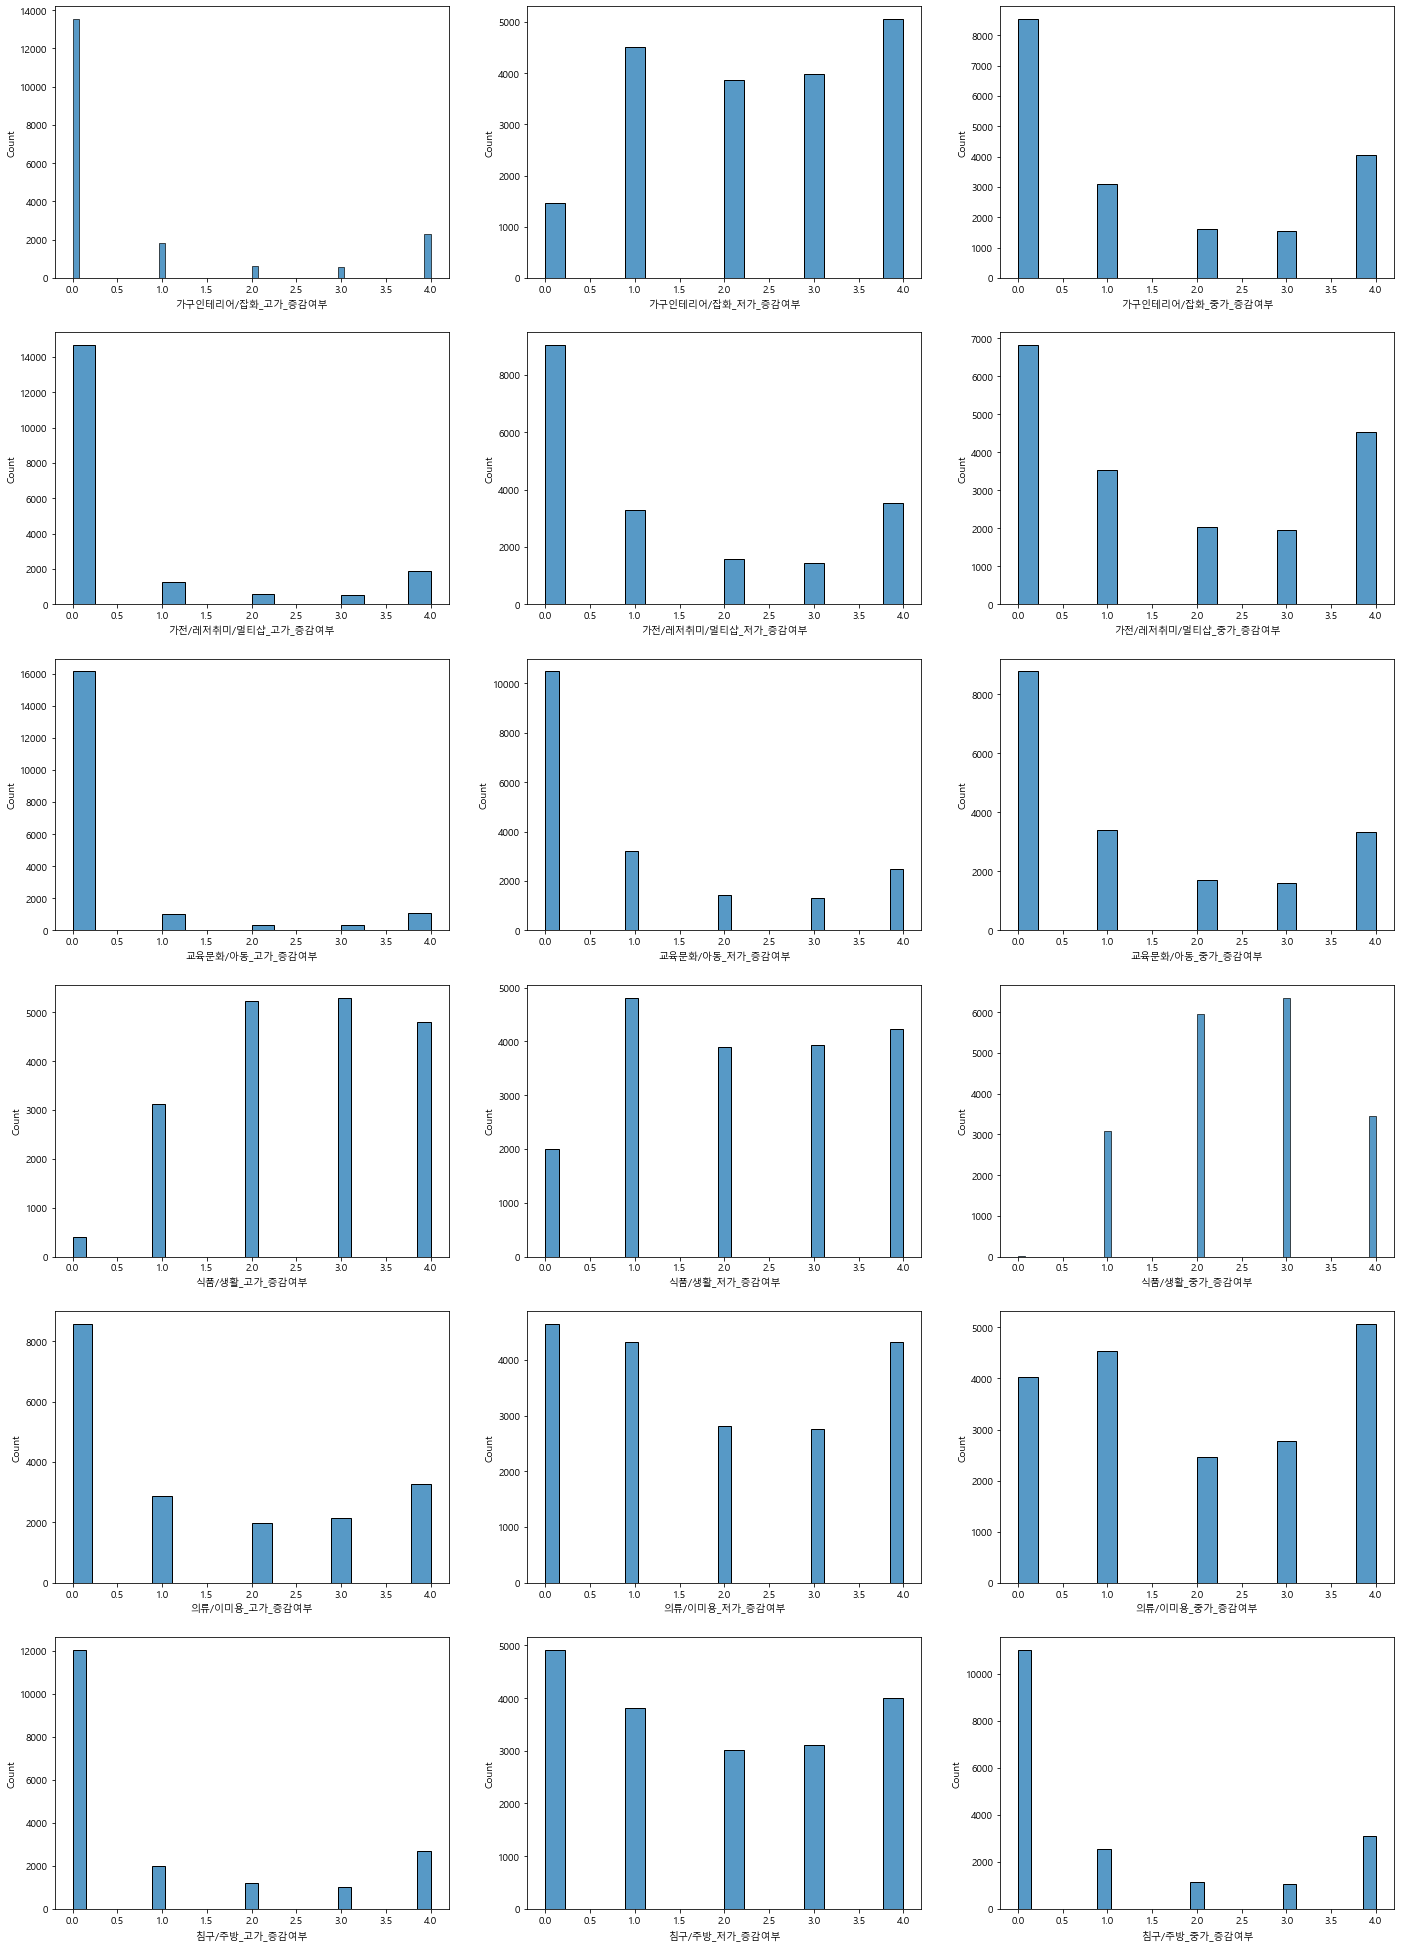

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

# 함수 생성
def hist_features(df):
    df_feature = df.columns.tolist()

    fig, axs = plt.subplots(figsize = (24, 35), nrows = 6, ncols = 3) #6행 3열

    for index_, feature in enumerate(df_feature):
        nrows = index_%3
        ncols = index_//3
        sns.histplot(df[feature], ax = axs[ncols][nrows])

hist_features(q2_q1_df)

## 2분기 대비 3분기 데이터

In [272]:
q3_q2_df, q3_q2_total_ratio, q3_q2_plus_ratio, q3_q2_minus_ratio  = quater_weight_df(2, 3)
q3_q2_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,4,1,1,1,0,4,0,0,1,1,4,4,3,0,3,4,0,4
2,0,3,1,3,0,1,0,0,1,1,0,2,3,0,4,3,0,4
3,0,4,0,0,4,0,0,0,0,2,2,4,0,0,1,0,4,0
4,0,3,1,3,1,3,0,0,0,1,1,1,2,4,2,4,1,4
6,3,1,1,0,1,0,0,0,0,3,3,2,4,2,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,2,0,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0
19334,0,4,0,0,1,0,4,2,2,2,3,2,0,2,0,0,1,0
19335,0,4,0,0,1,1,1,2,3,2,1,2,0,1,1,0,3,1


### 컬럼 히스토그램 

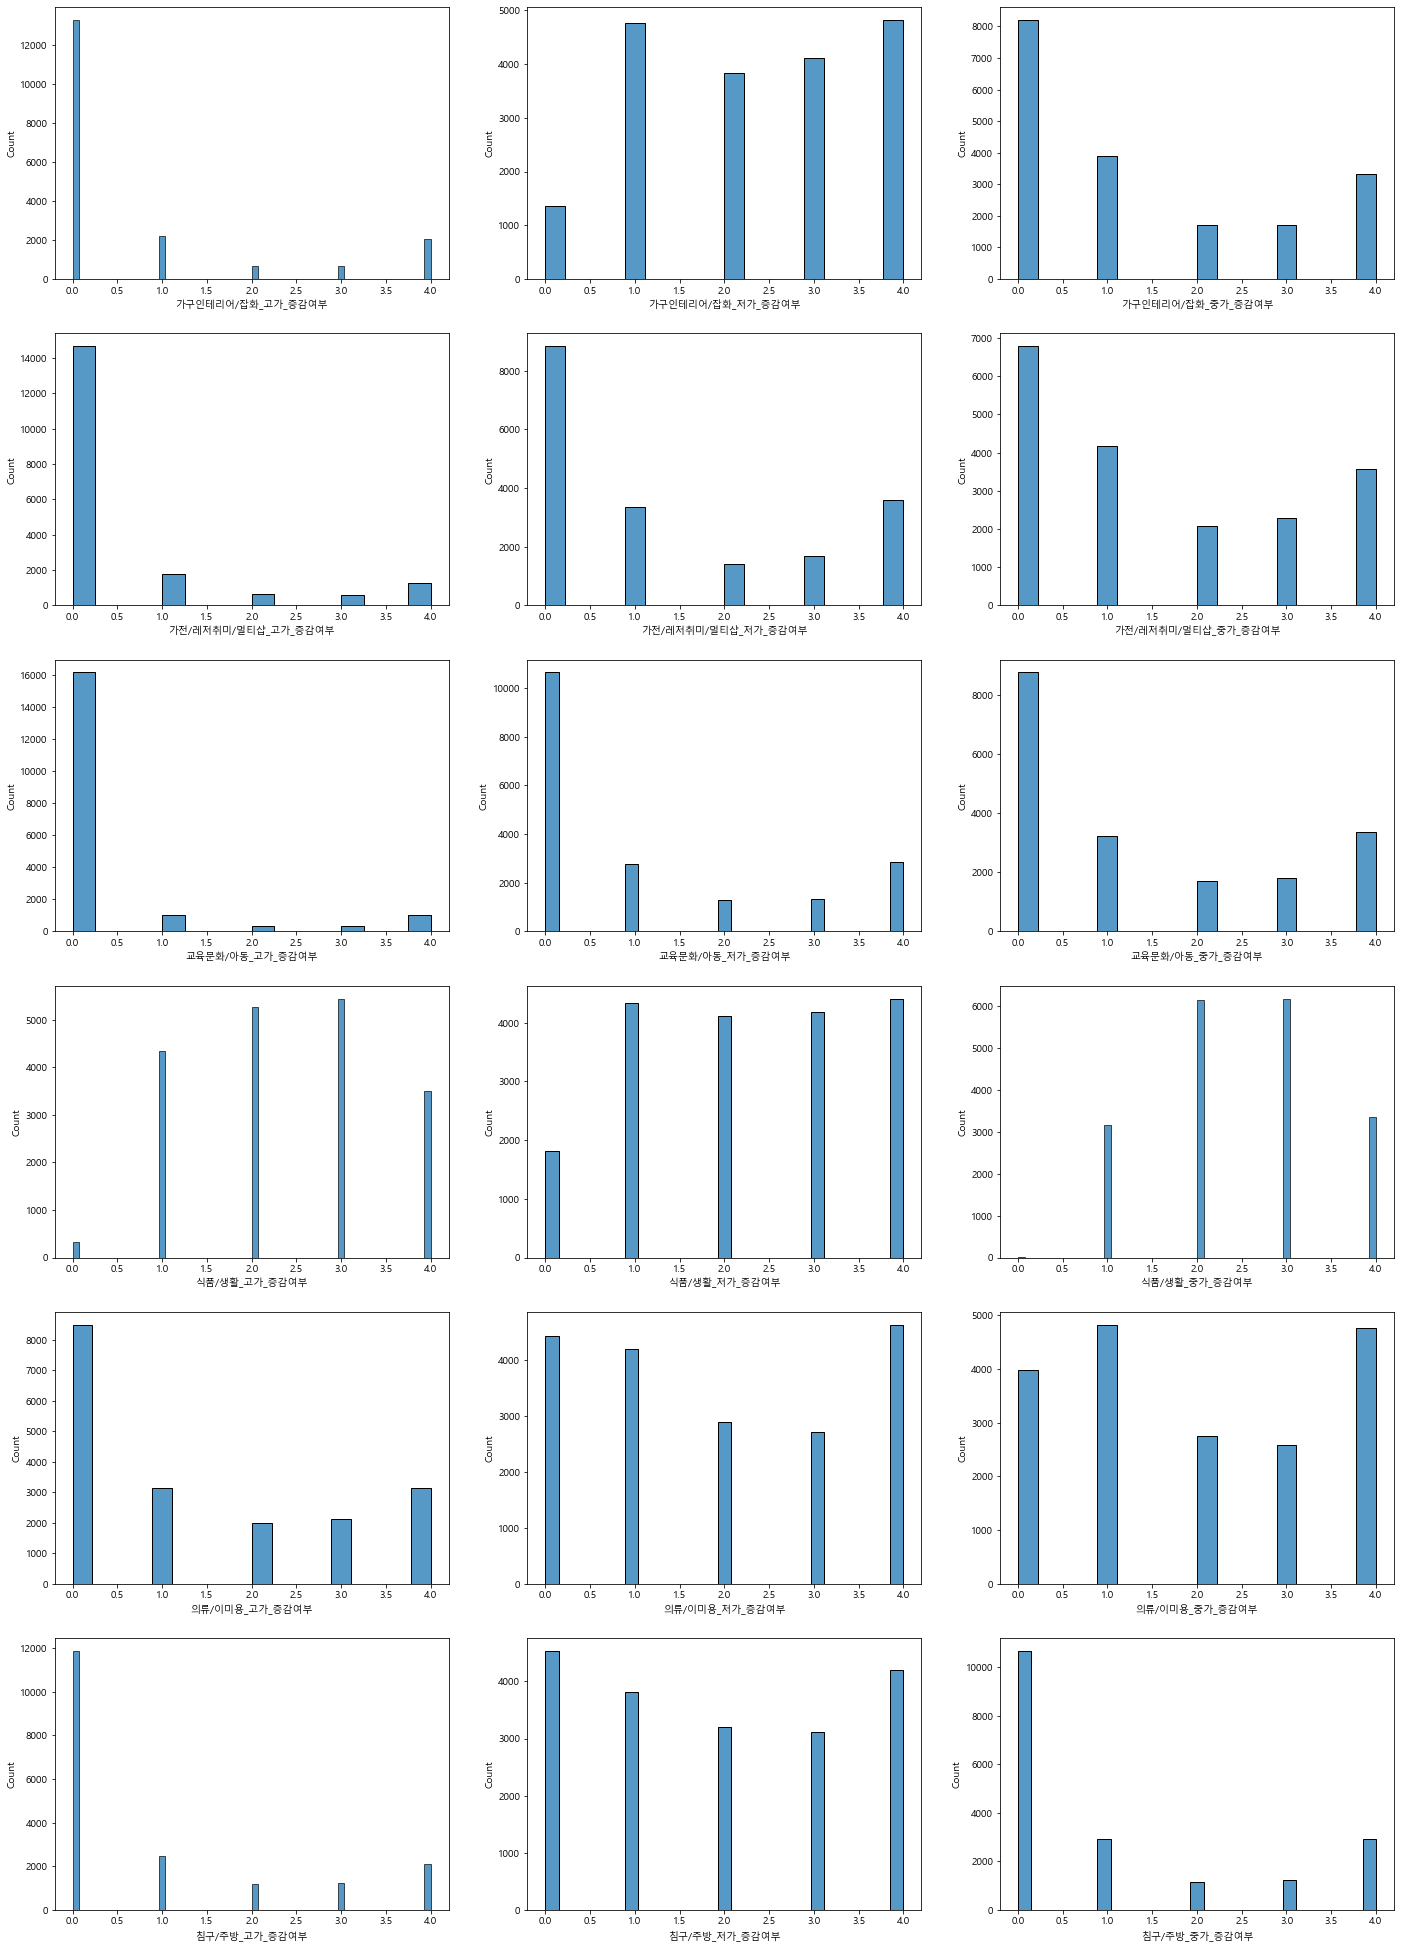

In [274]:
hist_features(q3_q2_df)

## 3분기 대비 4분기 데이터

In [275]:
q4_q3_df, q4_q3_total_ratio, q4_q3_plus_ratio, q4_q3_minus_ratio  = quater_weight_df(3, 4)
q4_q3_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,1,4,3,4,0,4,0,0,0,4,4,4,1,4,2,3,4,2
2,4,2,0,1,4,0,0,0,1,4,4,2,2,0,1,1,0,1
3,0,1,0,0,1,0,0,0,0,4,1,1,0,0,0,0,1,0
4,0,2,0,1,0,2,0,0,0,2,4,2,2,2,2,3,4,2
6,1,3,1,0,0,0,0,0,0,2,2,3,2,3,2,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,3,0,0,0,0,0,0,0,4,4,2,0,0,0,0,0,0
19334,0,4,0,0,4,0,2,4,3,3,4,2,0,2,0,0,4,0
19335,0,1,0,0,3,1,1,2,2,1,3,3,4,3,0,0,2,4


### 컬럼별 히스토그램 출력

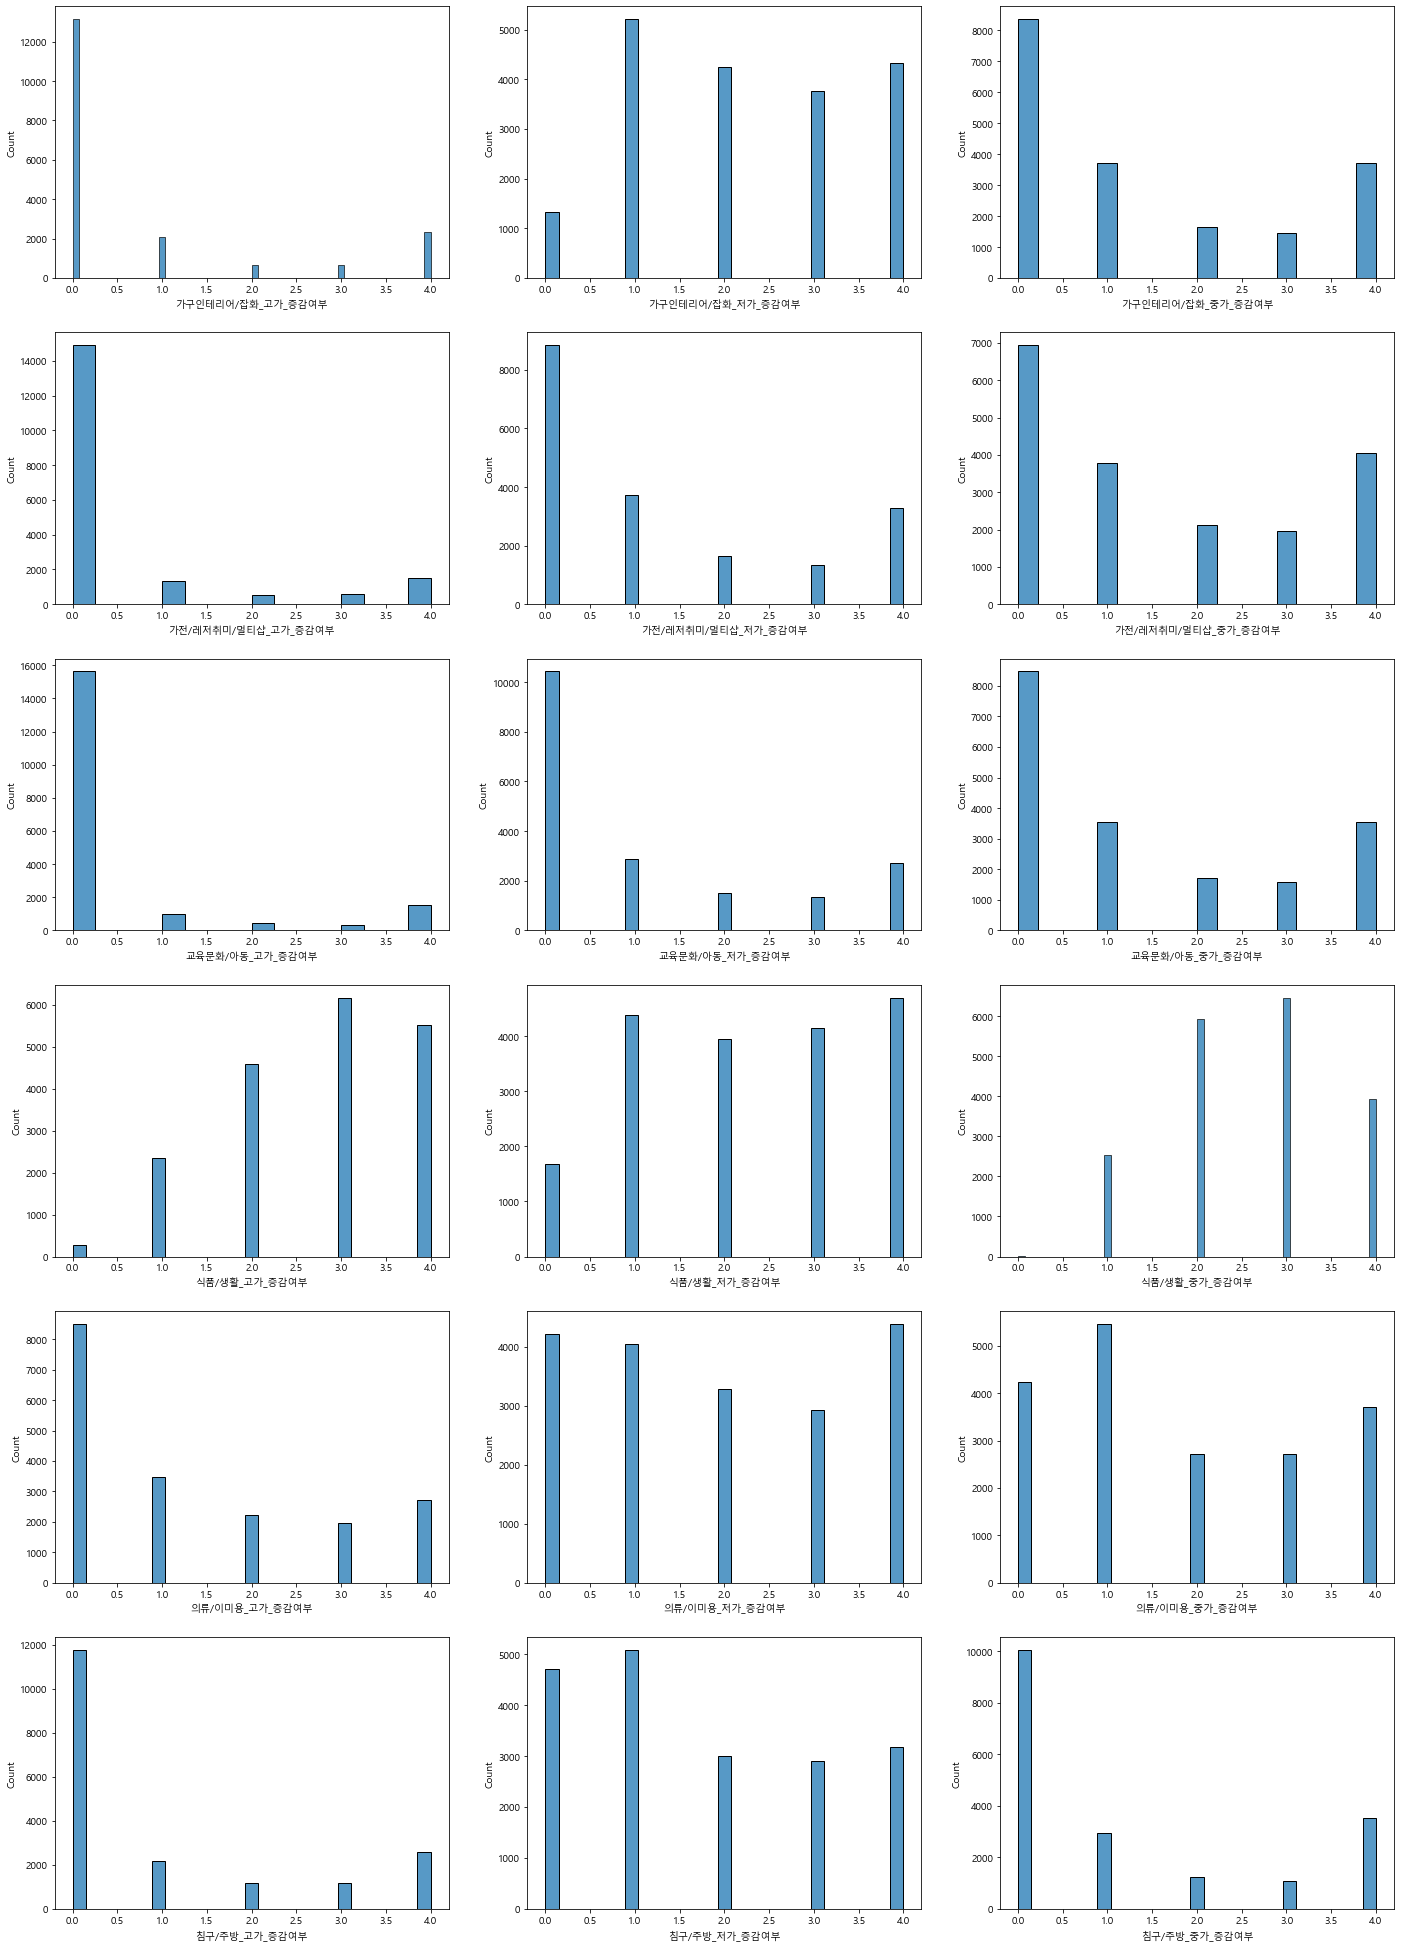

In [276]:
hist_features(q4_q3_df)

## 1분기 대비 3분기 데이터

In [277]:
q3_q1_df, q3_q1_total_ratio, q3_q1_plus_ratio, q3_q1_minus_ratio  = quater_weight_df(1, 3)
q3_q1_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,4,1,4,1,0,1,0,0,1,1,4,3,3,0,3,4,0,3
2,0,3,1,3,1,0,0,0,3,1,0,1,2,0,4,3,0,4
3,0,4,0,0,4,0,0,0,0,3,3,4,0,0,0,0,4,0
4,0,3,1,4,0,3,0,0,0,4,4,2,4,4,4,4,0,3
6,4,4,4,0,0,0,0,0,0,3,2,3,3,3,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,4,0,0,1,0,0,1,1,1,1,3,0,0,1,0,1,0
19334,0,4,0,0,4,0,4,3,3,4,4,4,0,2,0,0,4,0
19335,0,4,0,0,4,4,1,4,3,4,4,4,0,3,0,0,2,0


### 컬럼별 히스토그램 출력

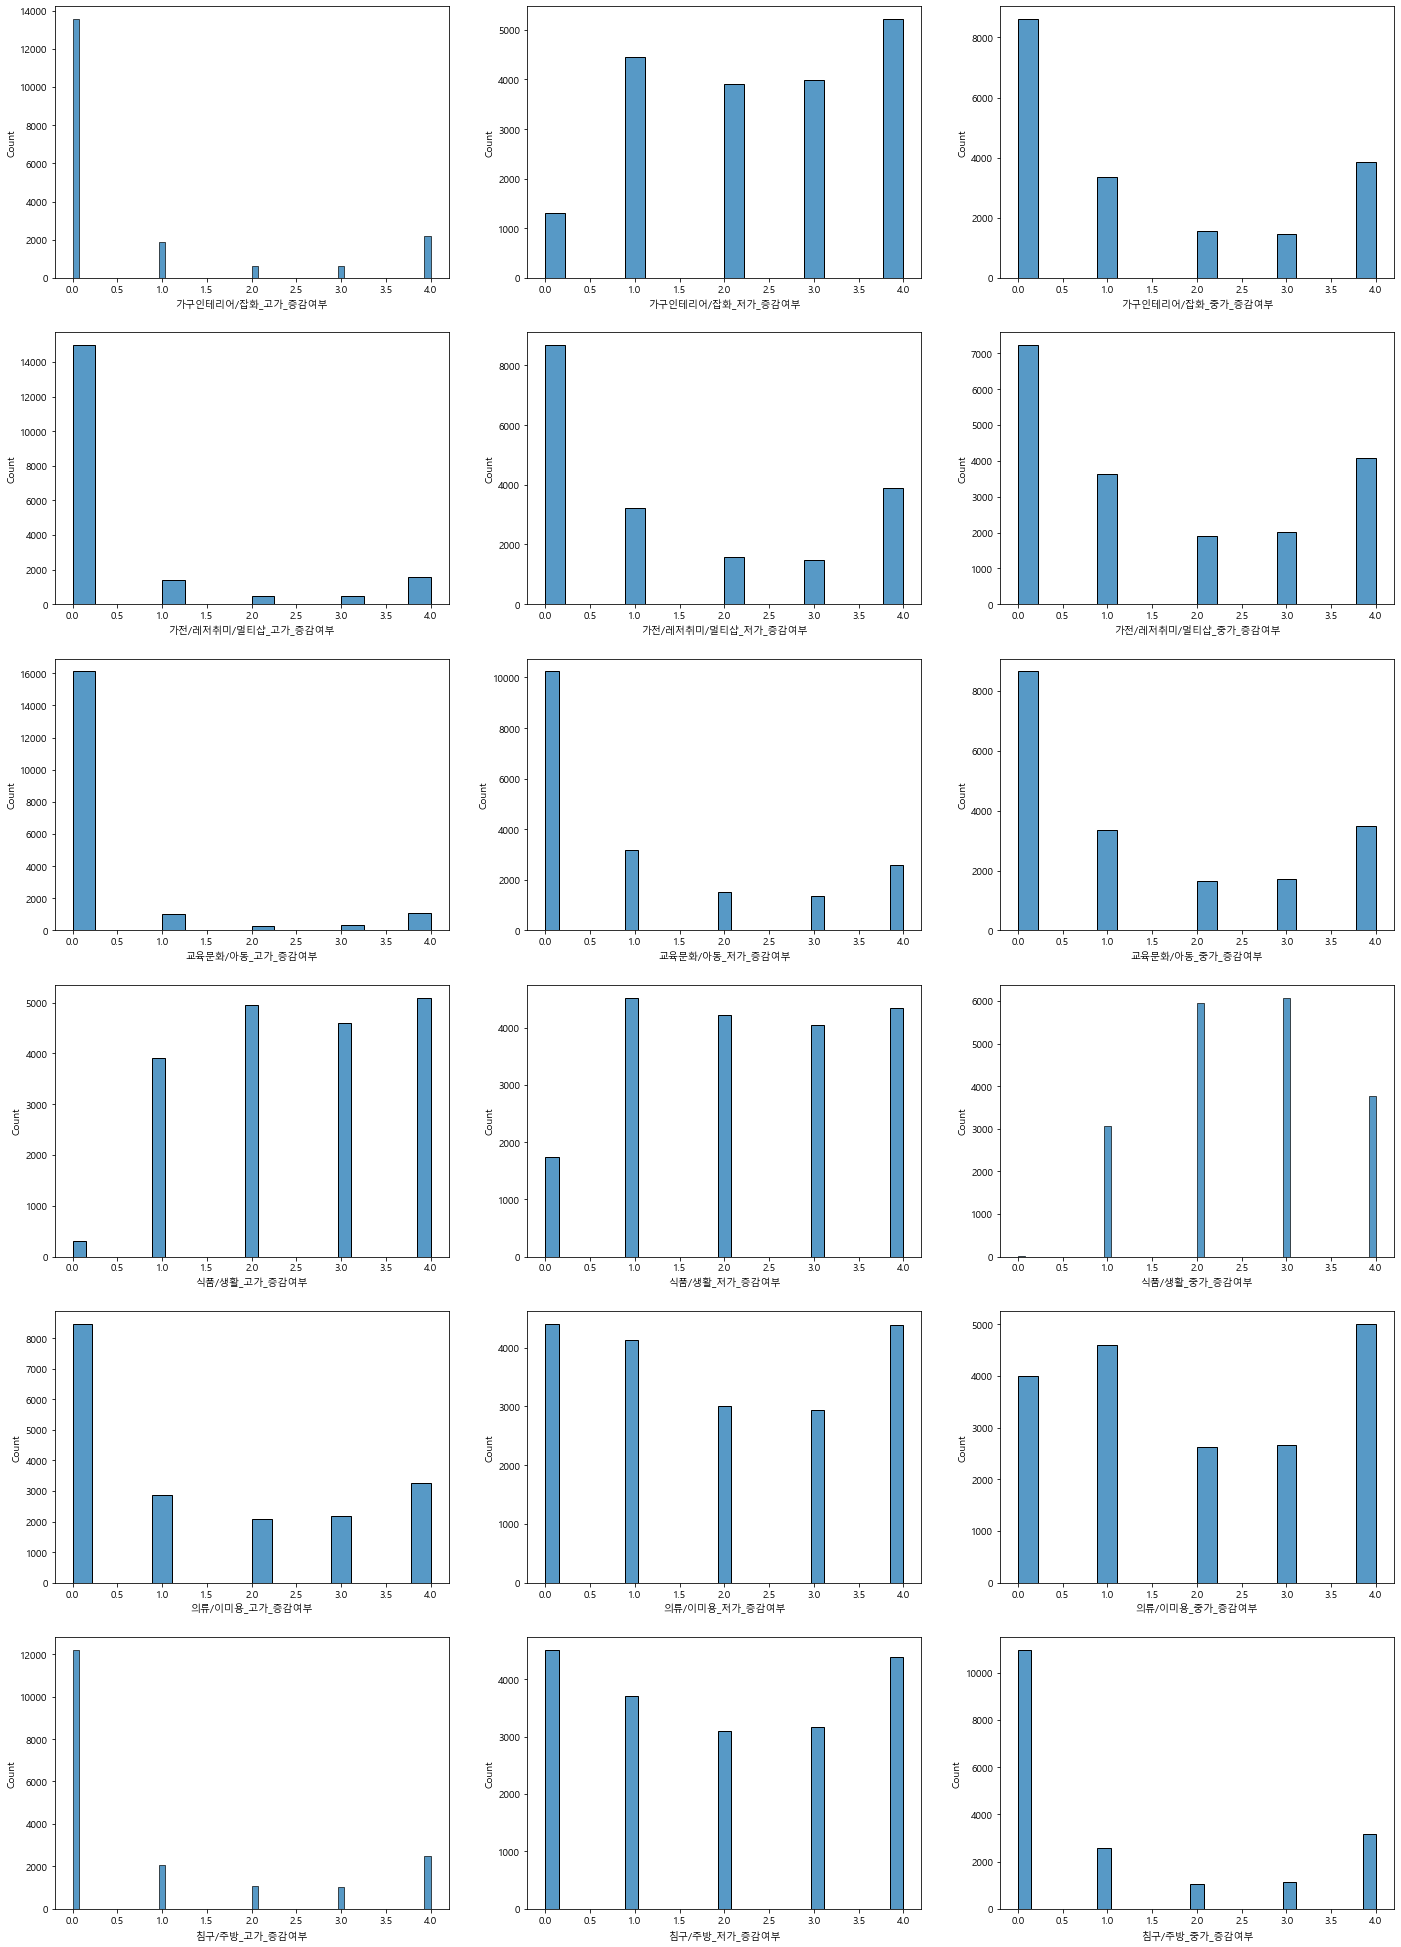

In [278]:
hist_features(q3_q1_df)

## 1분기 대비 4분기 데이터

In [279]:
q4_q1_df, q4_q1_total_ratio, q4_q1_plus_ratio, q4_q1_minus_ratio  = quater_weight_df(1, 4)
q4_q1_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,0,3,4,4,0,2,0,0,1,2,4,4,1,4,3,4,4,2
2,4,2,1,1,2,0,0,0,1,2,4,2,1,0,4,1,0,2
3,0,3,0,0,0,0,0,0,0,4,2,4,0,0,0,0,0,0
4,0,2,1,0,0,2,0,0,0,3,4,1,4,4,4,4,4,3
6,0,4,0,0,0,0,0,0,0,3,1,3,3,3,2,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,4,0,0,1,0,0,1,1,3,3,2,0,0,1,0,1,0
19334,0,4,0,0,4,0,4,4,4,4,4,4,0,2,0,0,4,0
19335,0,3,0,0,4,0,1,4,3,2,4,4,4,3,0,0,2,4


### 컬럼별 히스토그램 출력

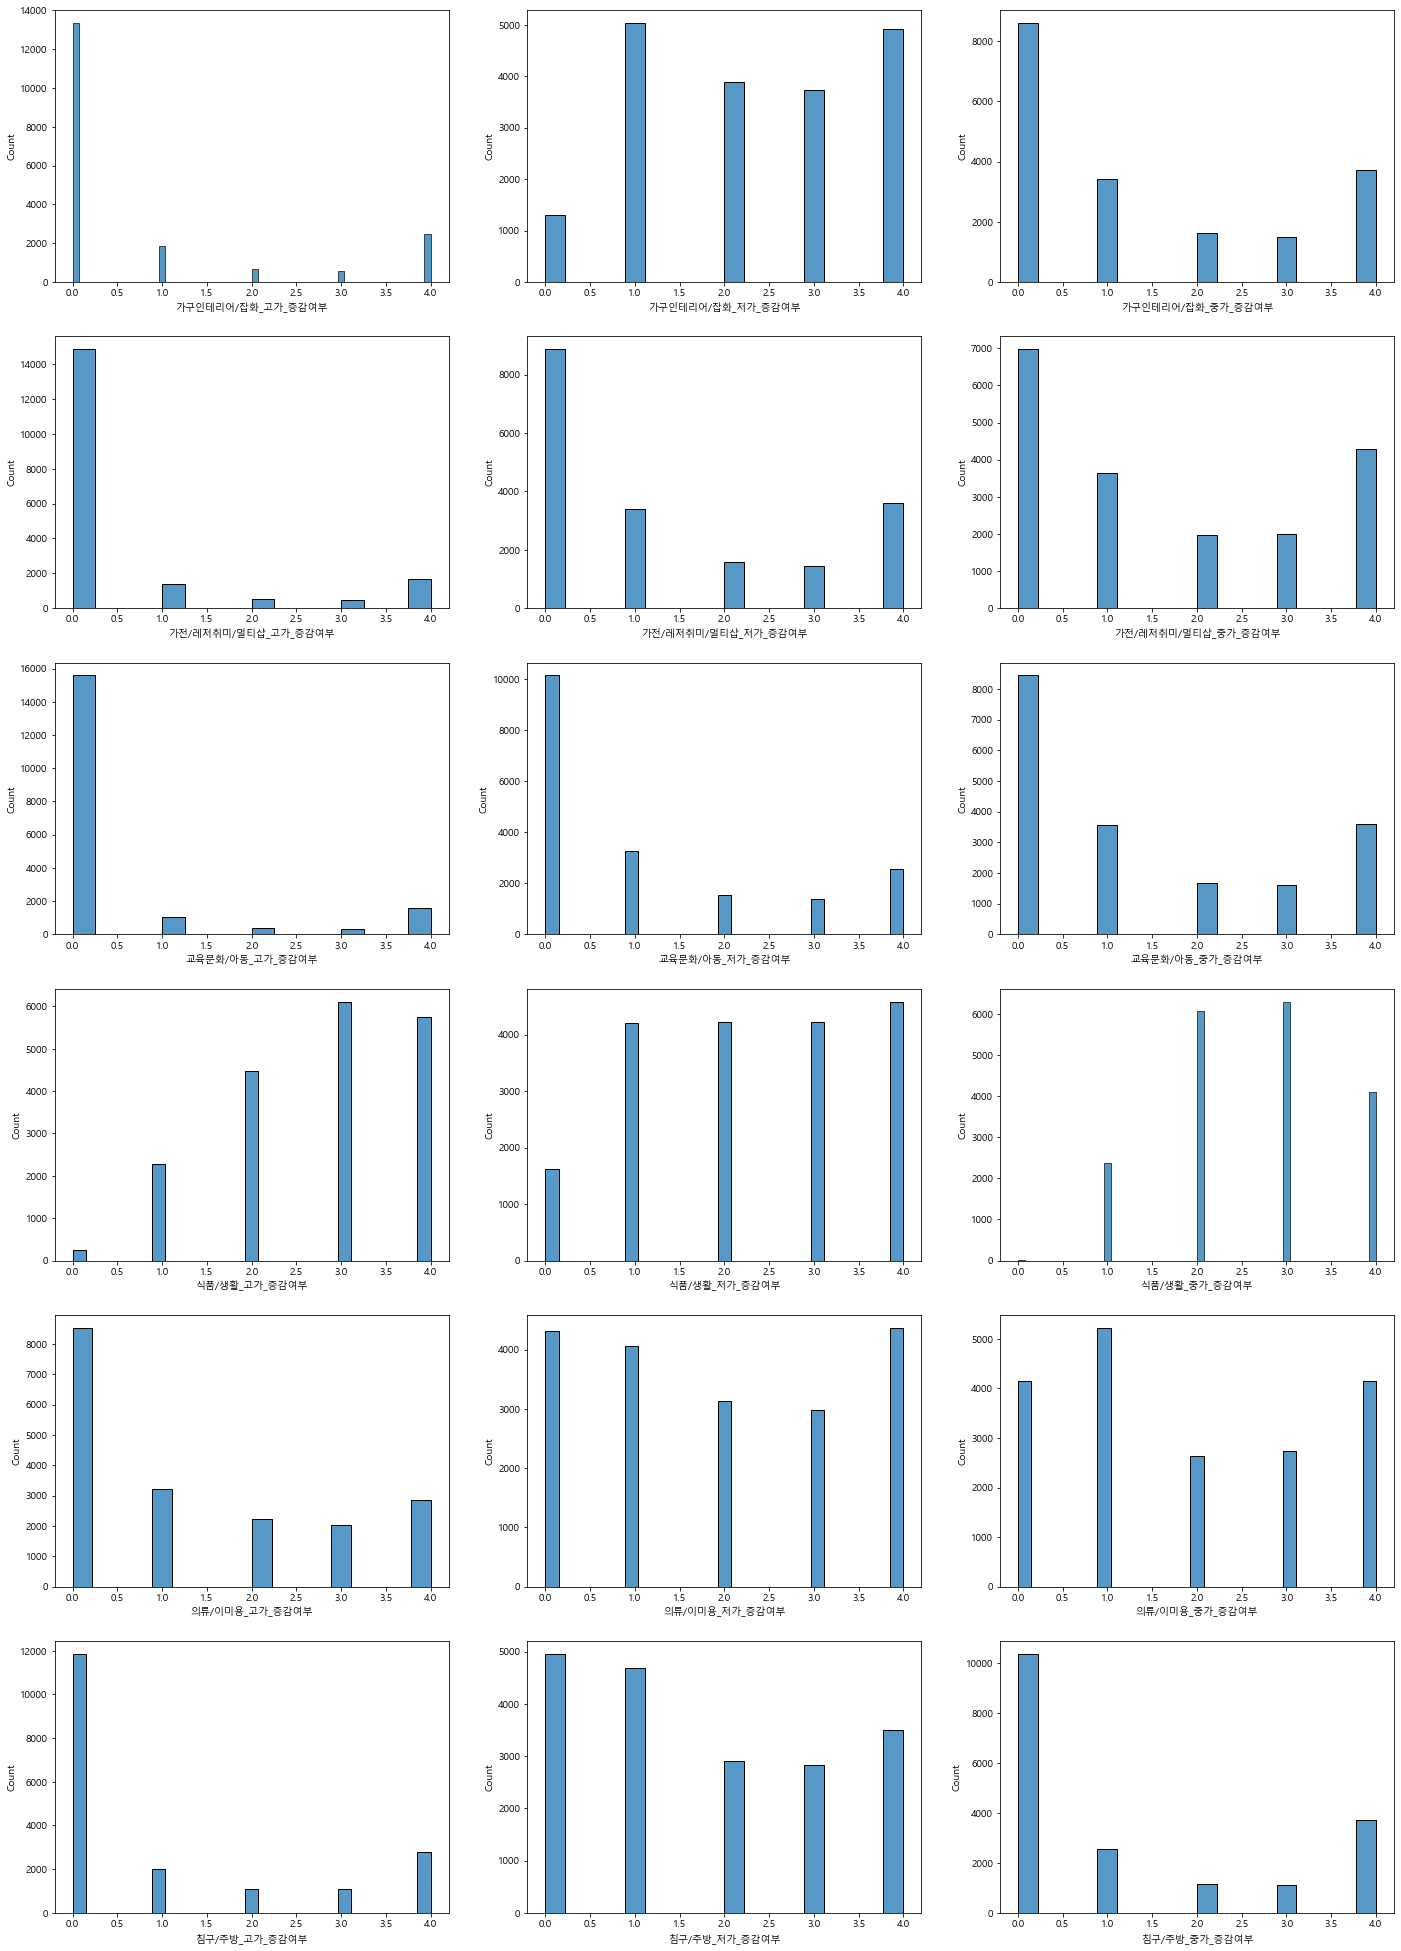

In [280]:
hist_features(q4_q1_df)

## 2분기 대비 4분기 데이터

In [281]:
q4_q2_df, q4_q2_total_ratio, q4_q2_plus_ratio, q4_q2_minus_ratio  = quater_weight_df(2, 4)
q4_q2_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,0,3,1,3,0,4,0,0,1,1,4,4,2,4,2,4,4,4
2,4,2,1,1,4,1,0,0,1,2,4,2,2,0,3,1,0,2
3,0,2,0,0,0,0,0,0,0,3,1,3,0,0,1,0,0,0
4,0,2,1,1,1,2,0,0,0,1,2,1,1,4,1,4,4,4
6,1,2,1,0,1,0,0,0,0,3,2,2,3,3,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,2,0,0,0,0,0,0,1,1,3,1,0,0,0,0,0,0
19334,0,4,0,0,3,0,4,3,3,2,4,2,0,2,0,0,3,0
19335,0,3,0,0,2,1,1,2,3,1,2,3,4,1,1,0,2,2


### 컬럼별 히스토그램 출력

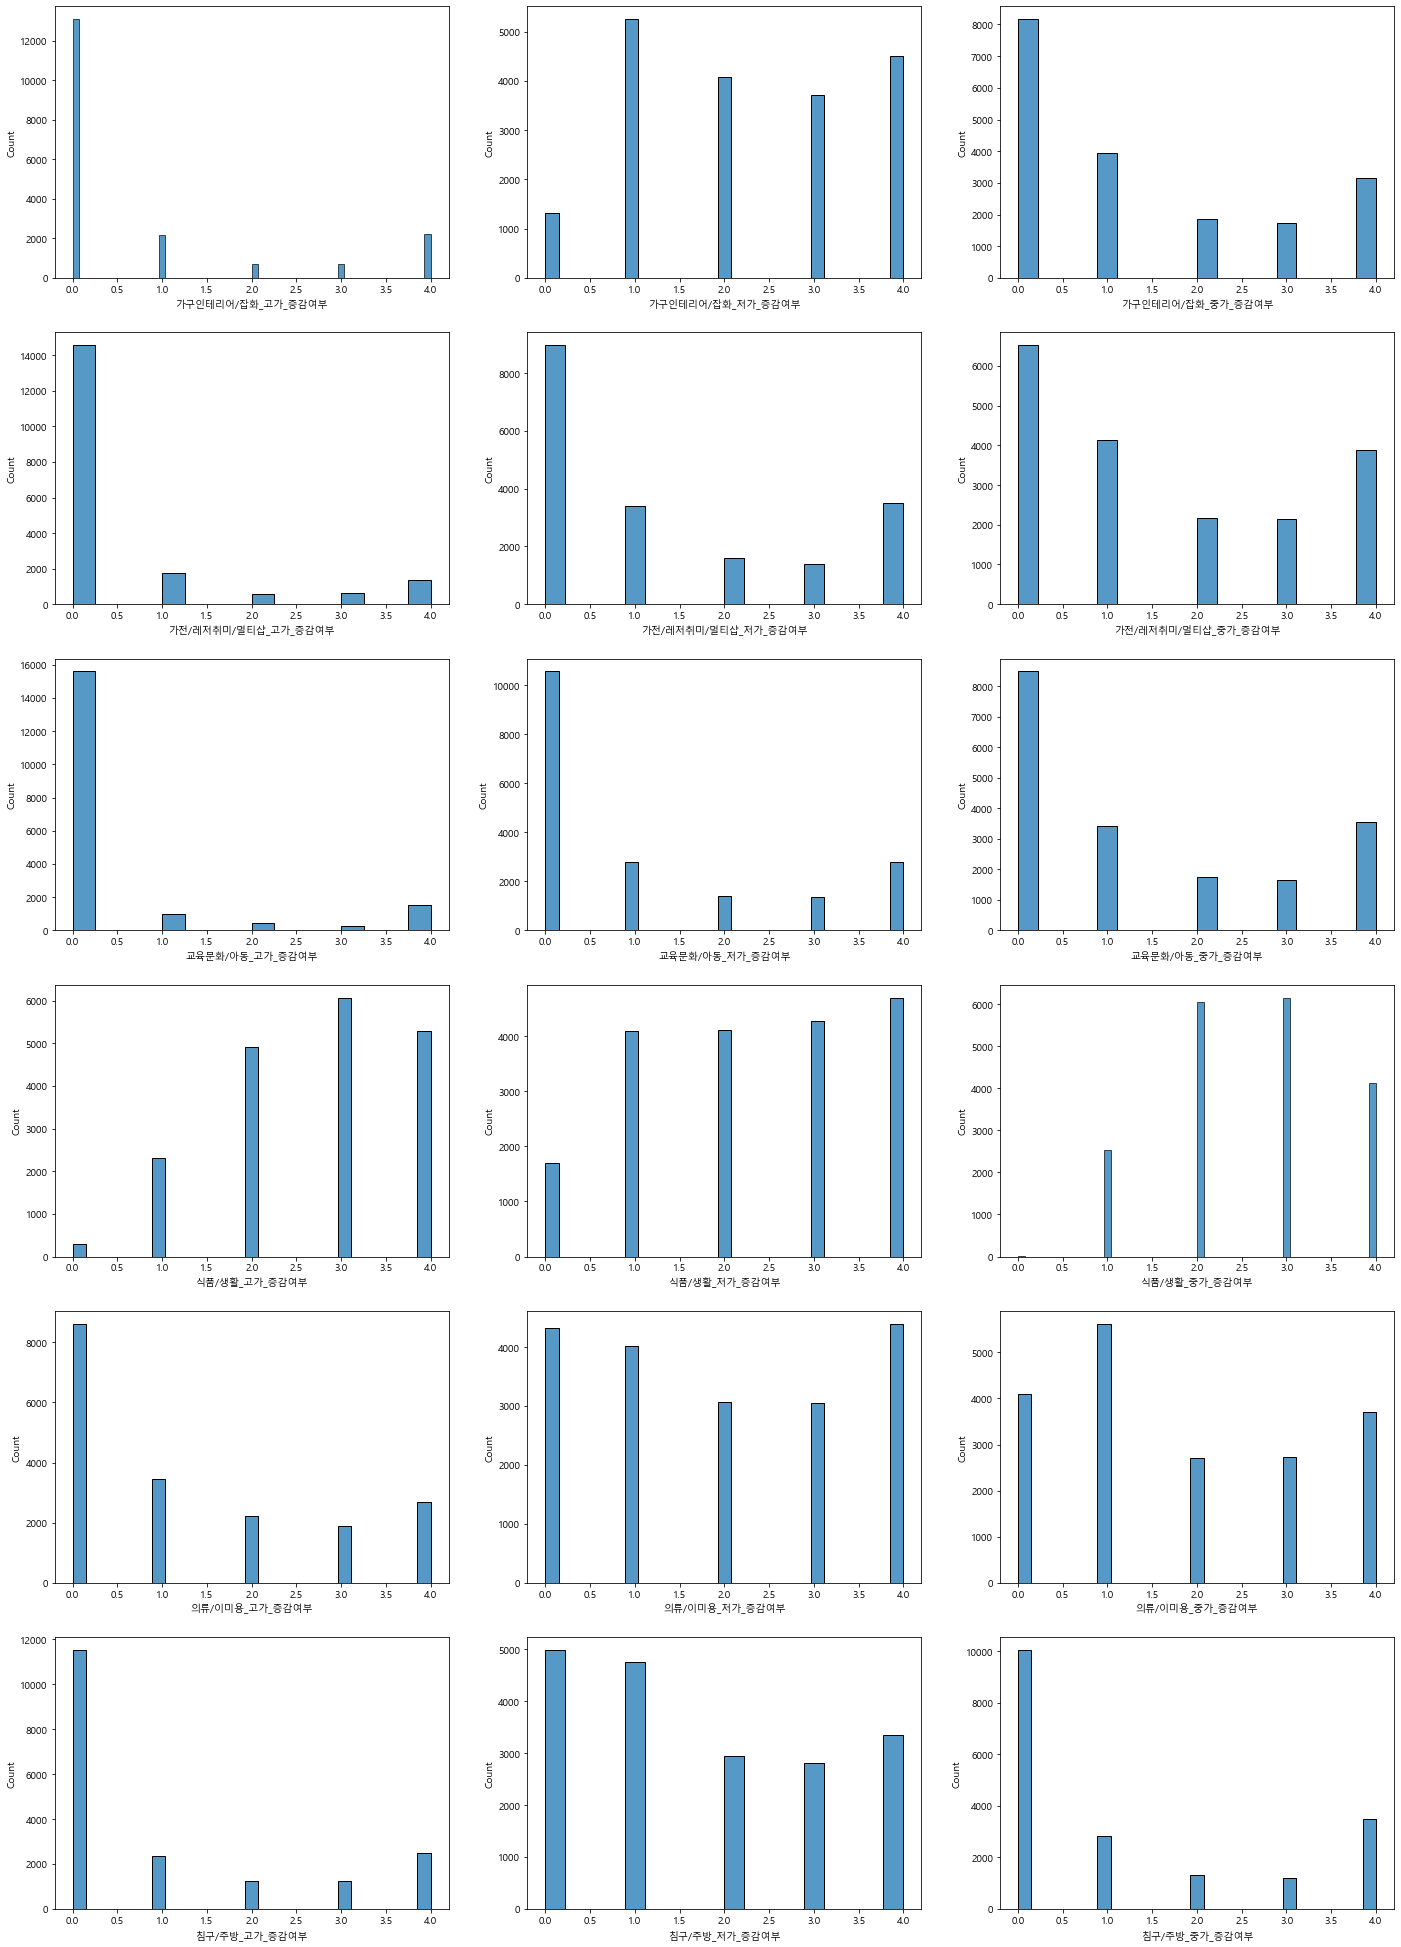

In [282]:
hist_features(q4_q2_df)

## 5분기 대비 6분기 데이터(15년도 1분기대비 15년도 2분기)

In [317]:
q6_q5_df, q6_q5_total_ratio, q6_q5_plus_ratio, q6_q5_minus_ratio  = quater_weight_df(5, 6)
q6_q5_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,2,2,1,1,0,1,0,0,0,3,3,1,3,0,3,2,1,1
2,1,3,1,2,1,0,0,0,1,1,4,1,2,4,3,1,0,4
3,0,4,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,0
4,0,4,4,0,0,3,0,4,0,4,4,2,4,4,2,1,0,0
6,4,3,4,0,0,0,0,0,0,2,1,1,3,3,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,4,1,1,0,0,0,0,0,0
19334,0,2,0,0,0,0,1,3,1,3,2,1,0,3,0,0,1,0
19335,0,4,4,0,3,4,4,2,3,4,1,2,4,1,1,0,4,1


### 컬럼별 히스토그램 출력

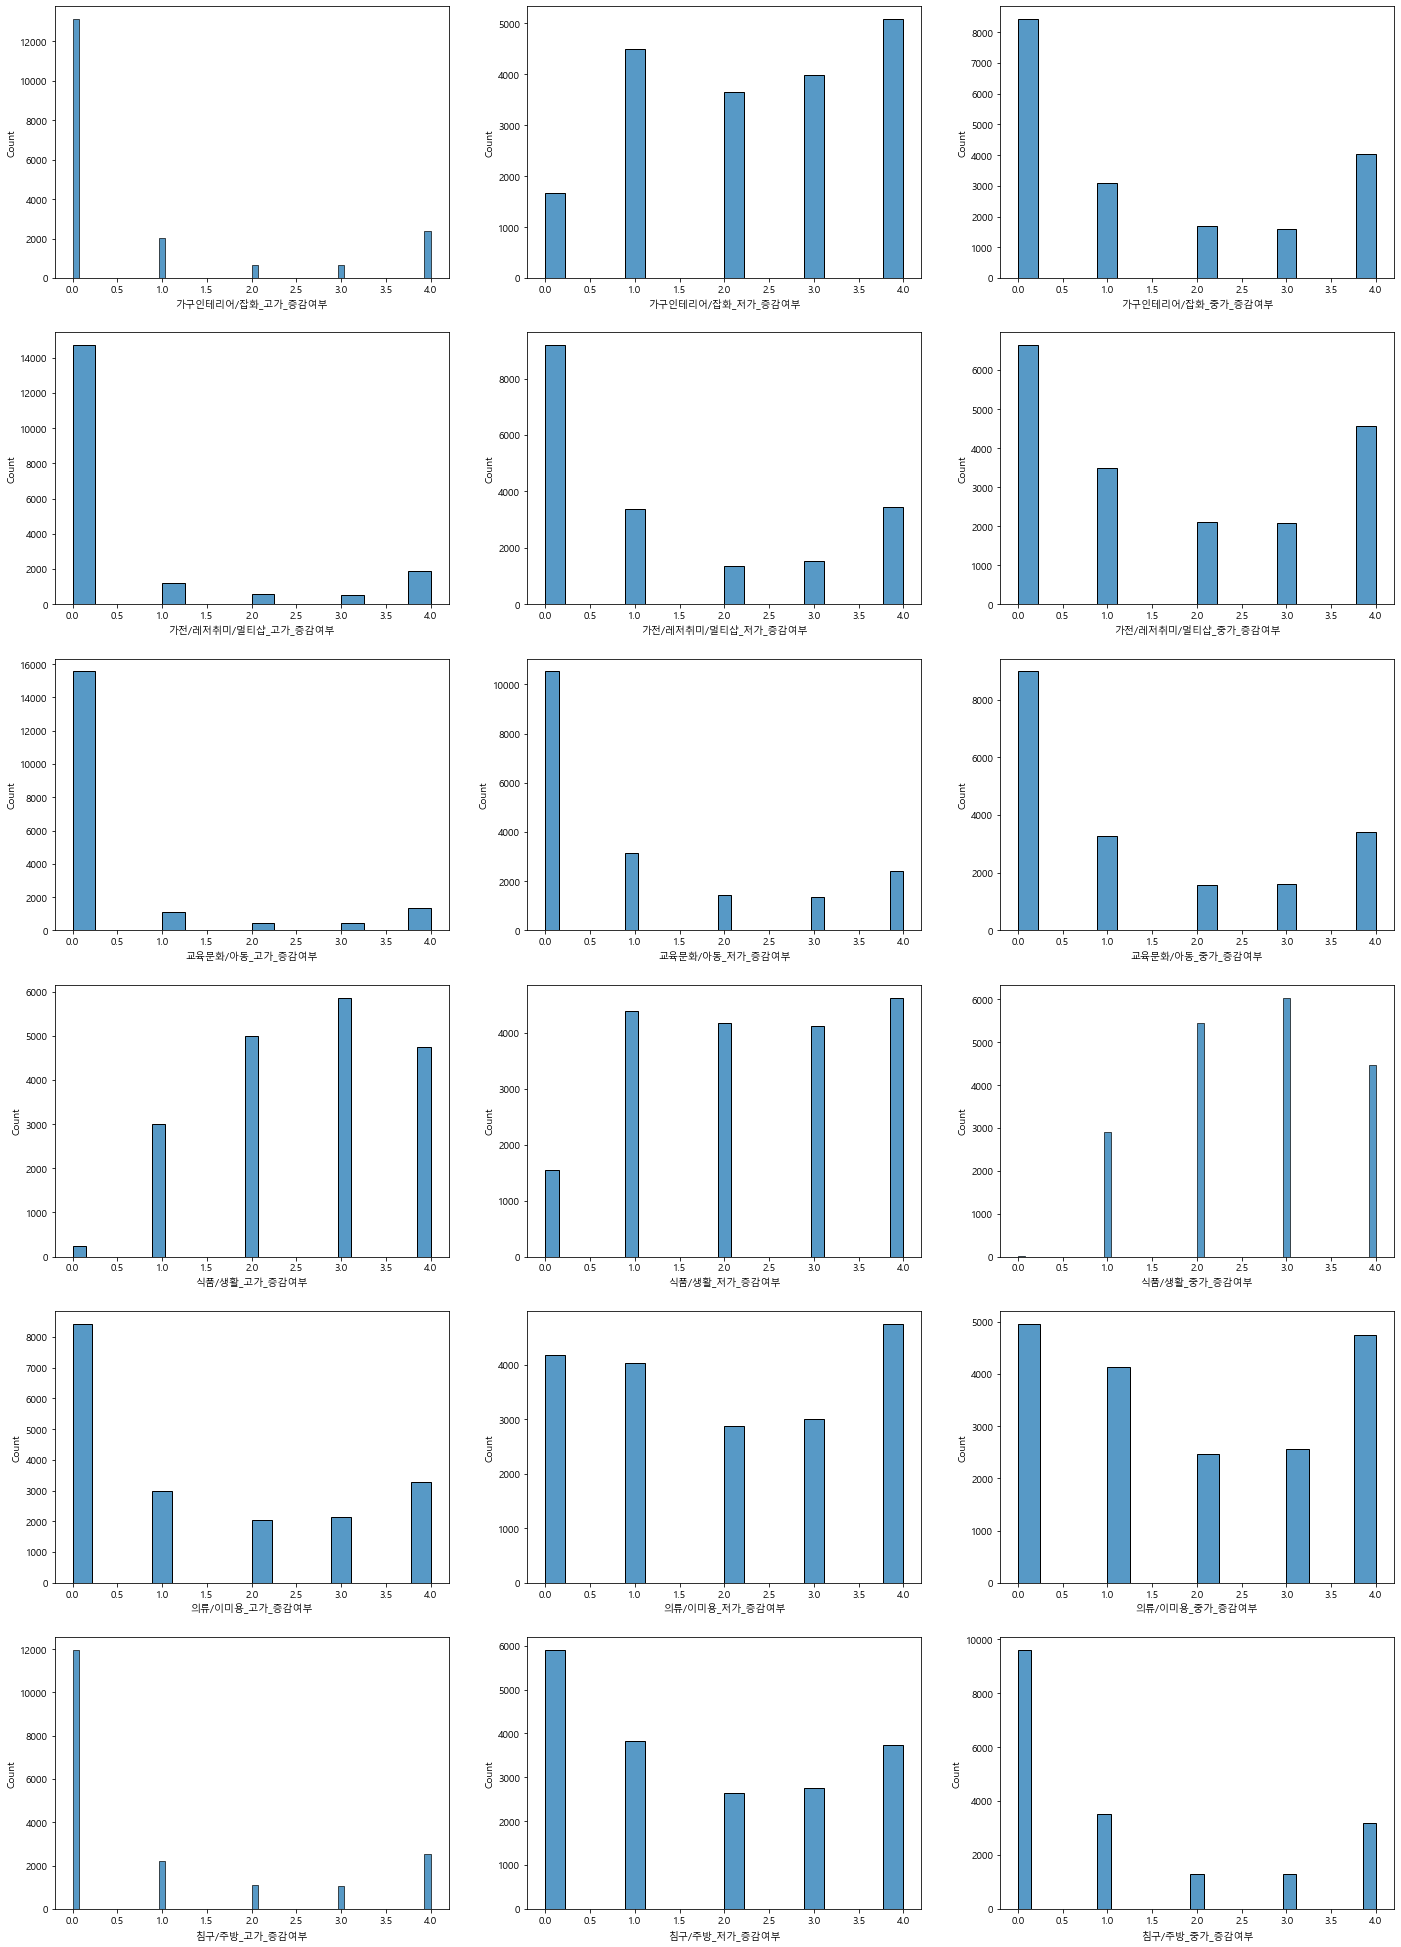

In [318]:
hist_features(q6_q5_df)

## 5분기 대비 7분기 데이터

In [319]:
q7_q5_df, q7_q5_total_ratio, q7_q5_plus_ratio, q7_q5_minus_ratio  = quater_weight_df(5, 7)
q7_q5_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,1,1,3,2,0,2,0,0,0,1,1,1,2,0,3,3,1,1
2,1,4,1,3,1,0,0,0,1,2,4,1,2,4,4,2,0,4
3,0,4,0,0,4,0,0,0,0,4,2,4,0,0,0,0,0,0
4,0,3,4,0,4,4,0,0,0,3,4,2,2,4,3,3,0,0
6,4,1,4,0,0,0,0,4,0,3,1,2,2,4,4,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
19334,0,1,0,0,0,0,1,1,3,1,1,1,0,1,4,0,1,0
19335,0,3,0,0,4,1,4,2,3,2,2,1,0,1,1,0,3,1


### 컬럼별 히스토그램 출력

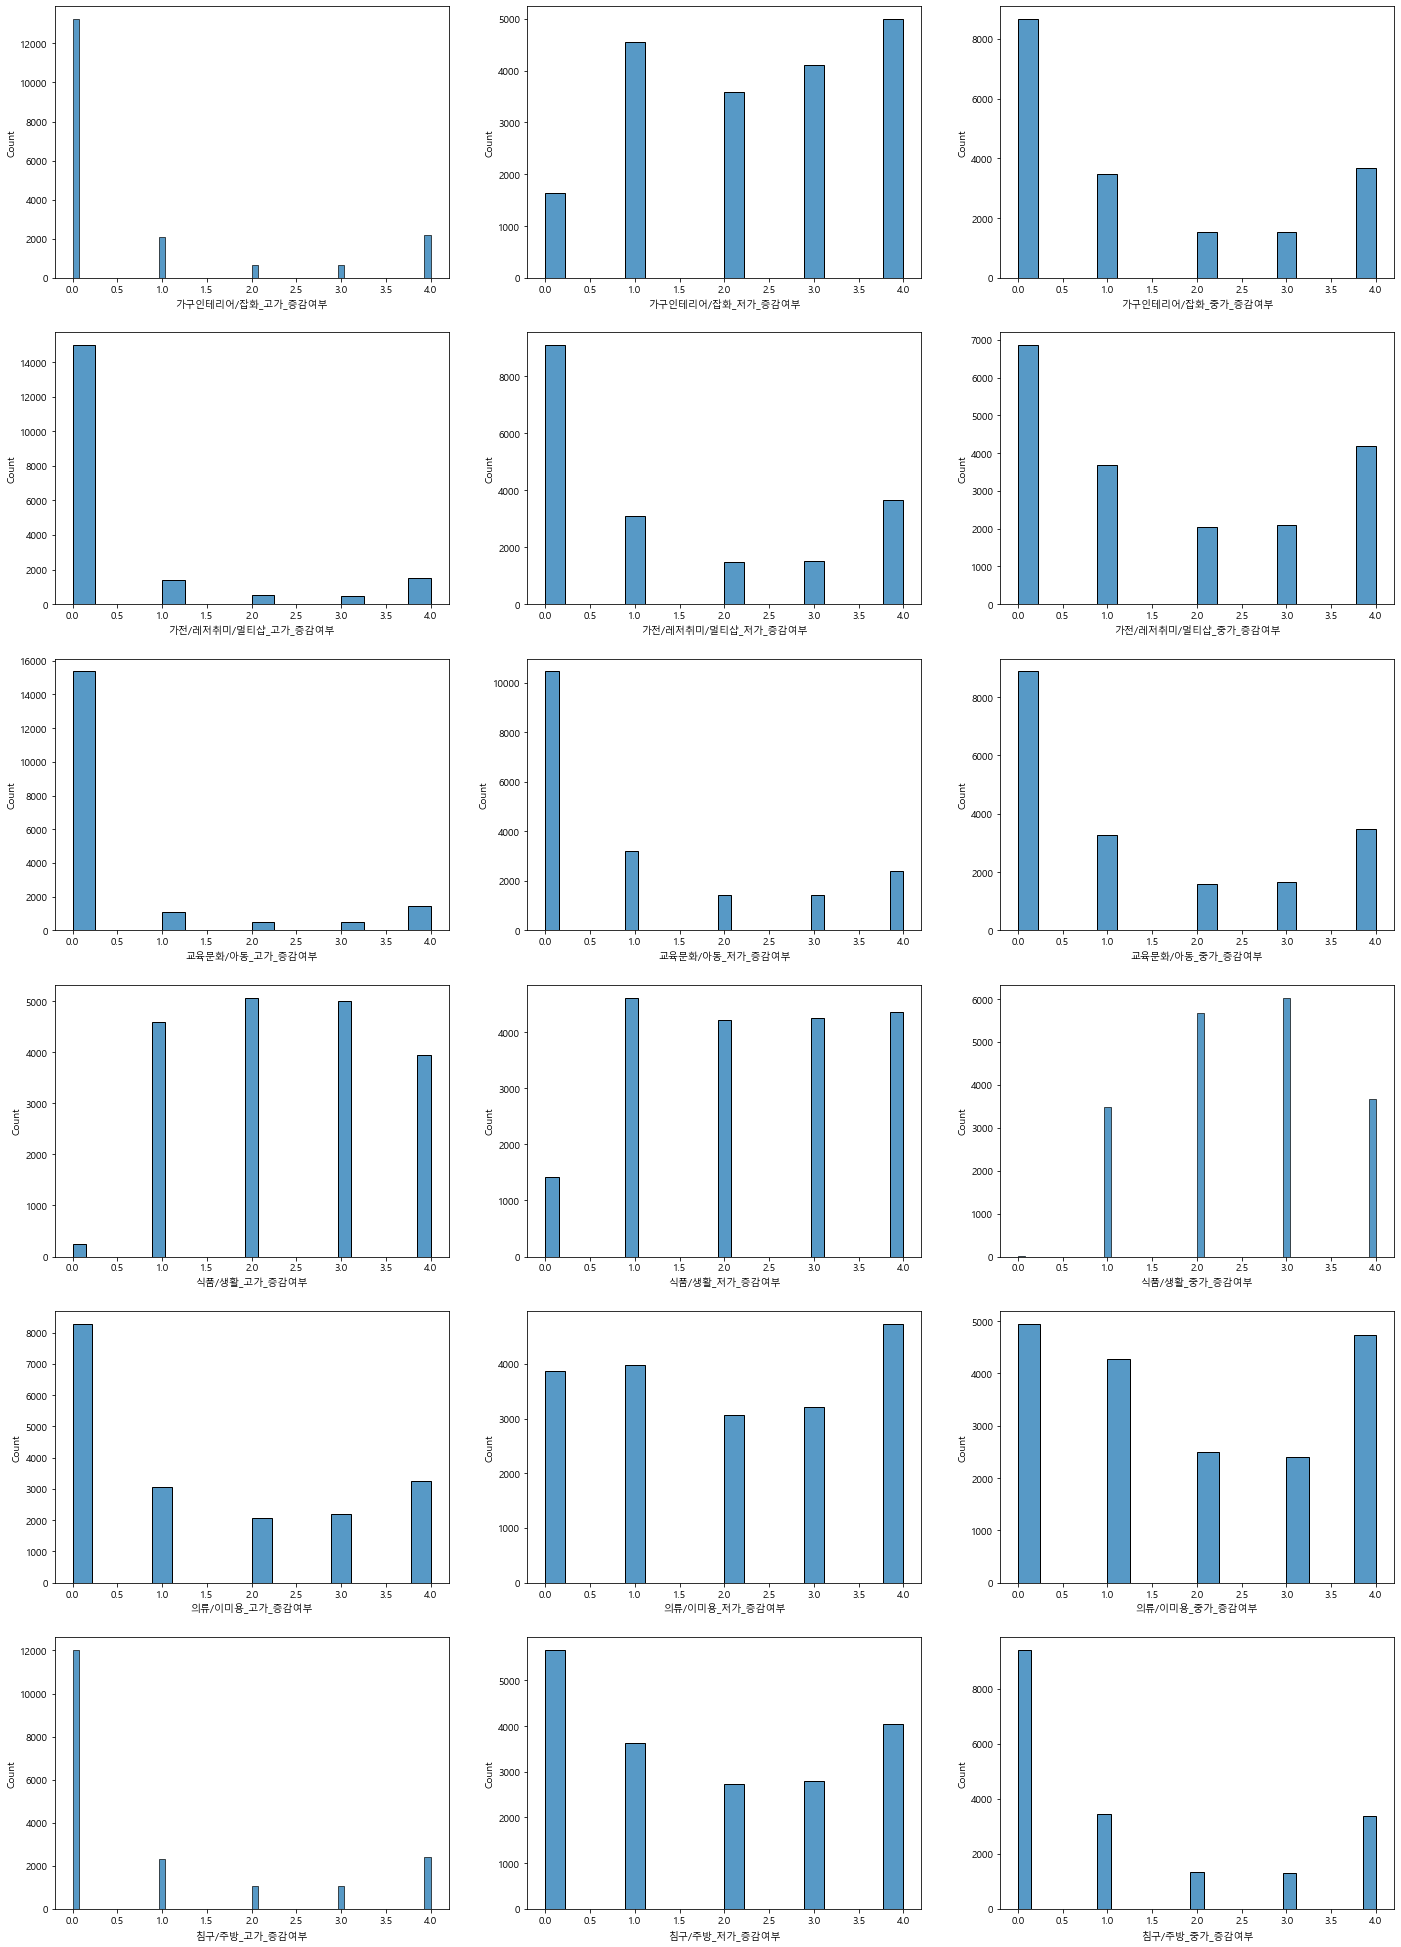

In [320]:
hist_features(q7_q5_df)

## 5분기 대비 8분기 데이터

In [321]:
q8_q5_df, q8_q5_total_ratio, q8_q5_plus_ratio, q8_q5_minus_ratio  = quater_weight_df(5, 8)
q8_q5_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,1,2,1,2,0,1,0,0,0,2,1,1,1,0,2,2,1,3
2,1,3,1,1,1,0,0,0,1,2,0,3,2,0,4,1,0,4
3,0,4,0,0,0,0,0,0,0,1,2,4,0,4,0,0,0,0
4,0,3,0,0,0,1,0,0,0,3,4,2,1,4,2,1,0,4
6,4,2,4,4,4,0,0,4,0,3,1,3,3,4,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,0,0,0
19334,0,1,0,0,4,0,2,1,2,1,1,1,0,1,0,0,1,0
19335,0,2,0,0,3,1,0,1,4,2,1,2,0,2,1,0,2,1


### 컬럼별 히스토그램 출력

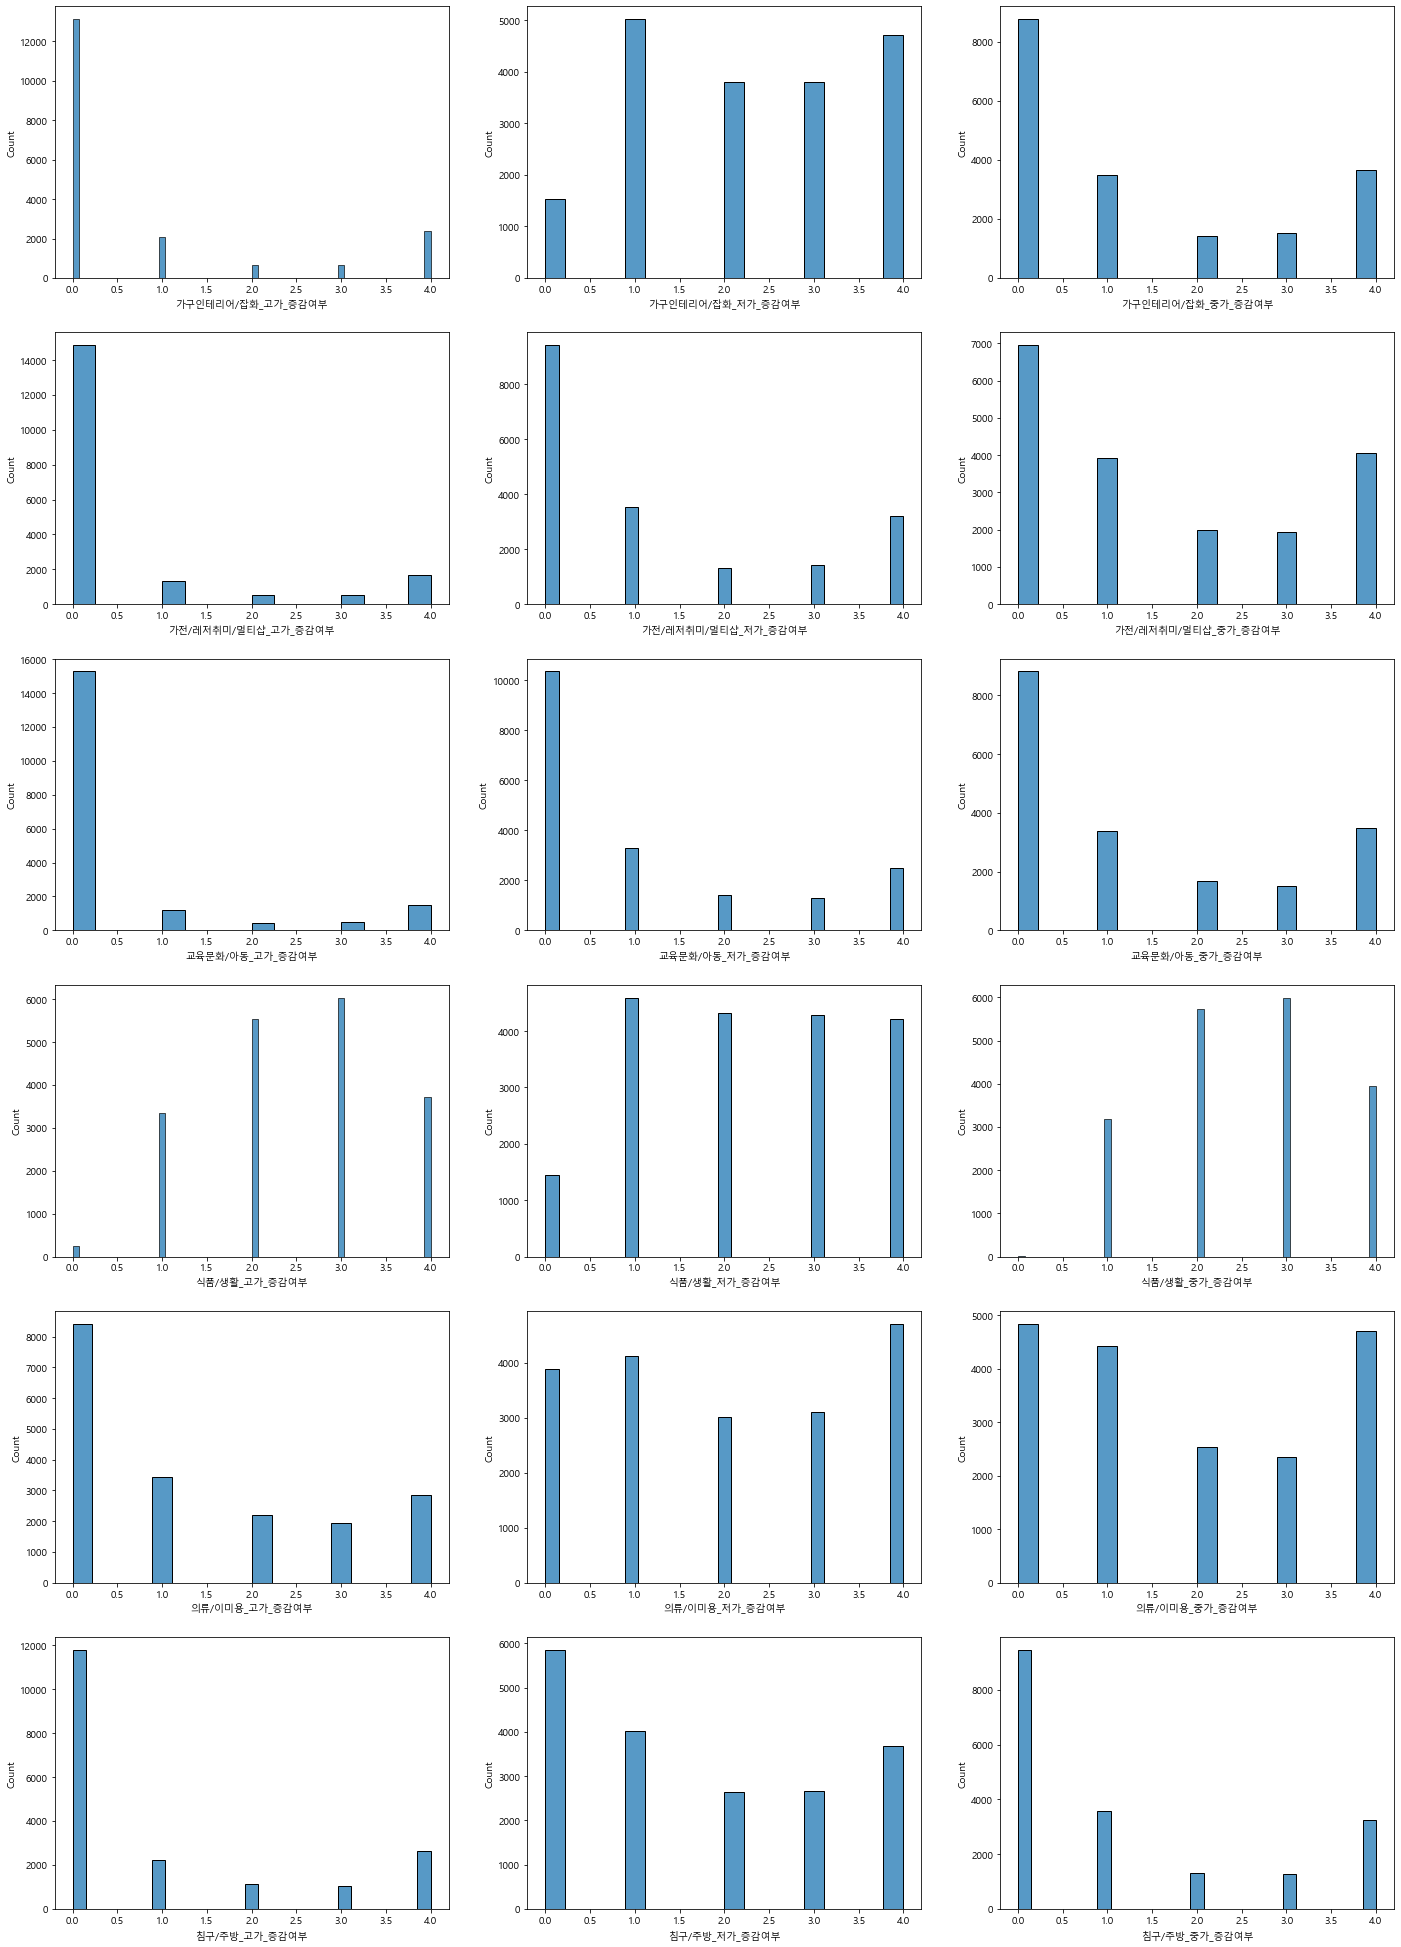

In [322]:
hist_features(q8_q5_df)

## 6분기 대비 7분기 데이터

In [323]:
q7_q6_df, q7_q6_total_ratio, q7_q6_plus_ratio, q7_q6_minus_ratio  = quater_weight_df(6, 7)
q7_q6_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,1,1,4,4,0,3,0,0,0,1,1,1,1,0,3,3,0,0
2,0,3,0,4,0,0,0,0,4,4,1,2,2,1,4,3,0,1
3,0,3,0,0,4,0,0,0,0,4,1,4,0,0,0,0,0,0
4,0,2,4,0,4,4,0,1,0,1,1,2,1,4,3,4,0,0
6,3,1,4,0,0,0,0,4,0,4,4,4,2,3,3,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0
19334,0,1,0,0,0,0,4,1,4,1,1,1,0,1,4,0,1,0
19335,0,2,1,0,3,1,3,2,3,1,3,2,1,1,0,0,2,0


### 컬럼별 히스토그램 출력

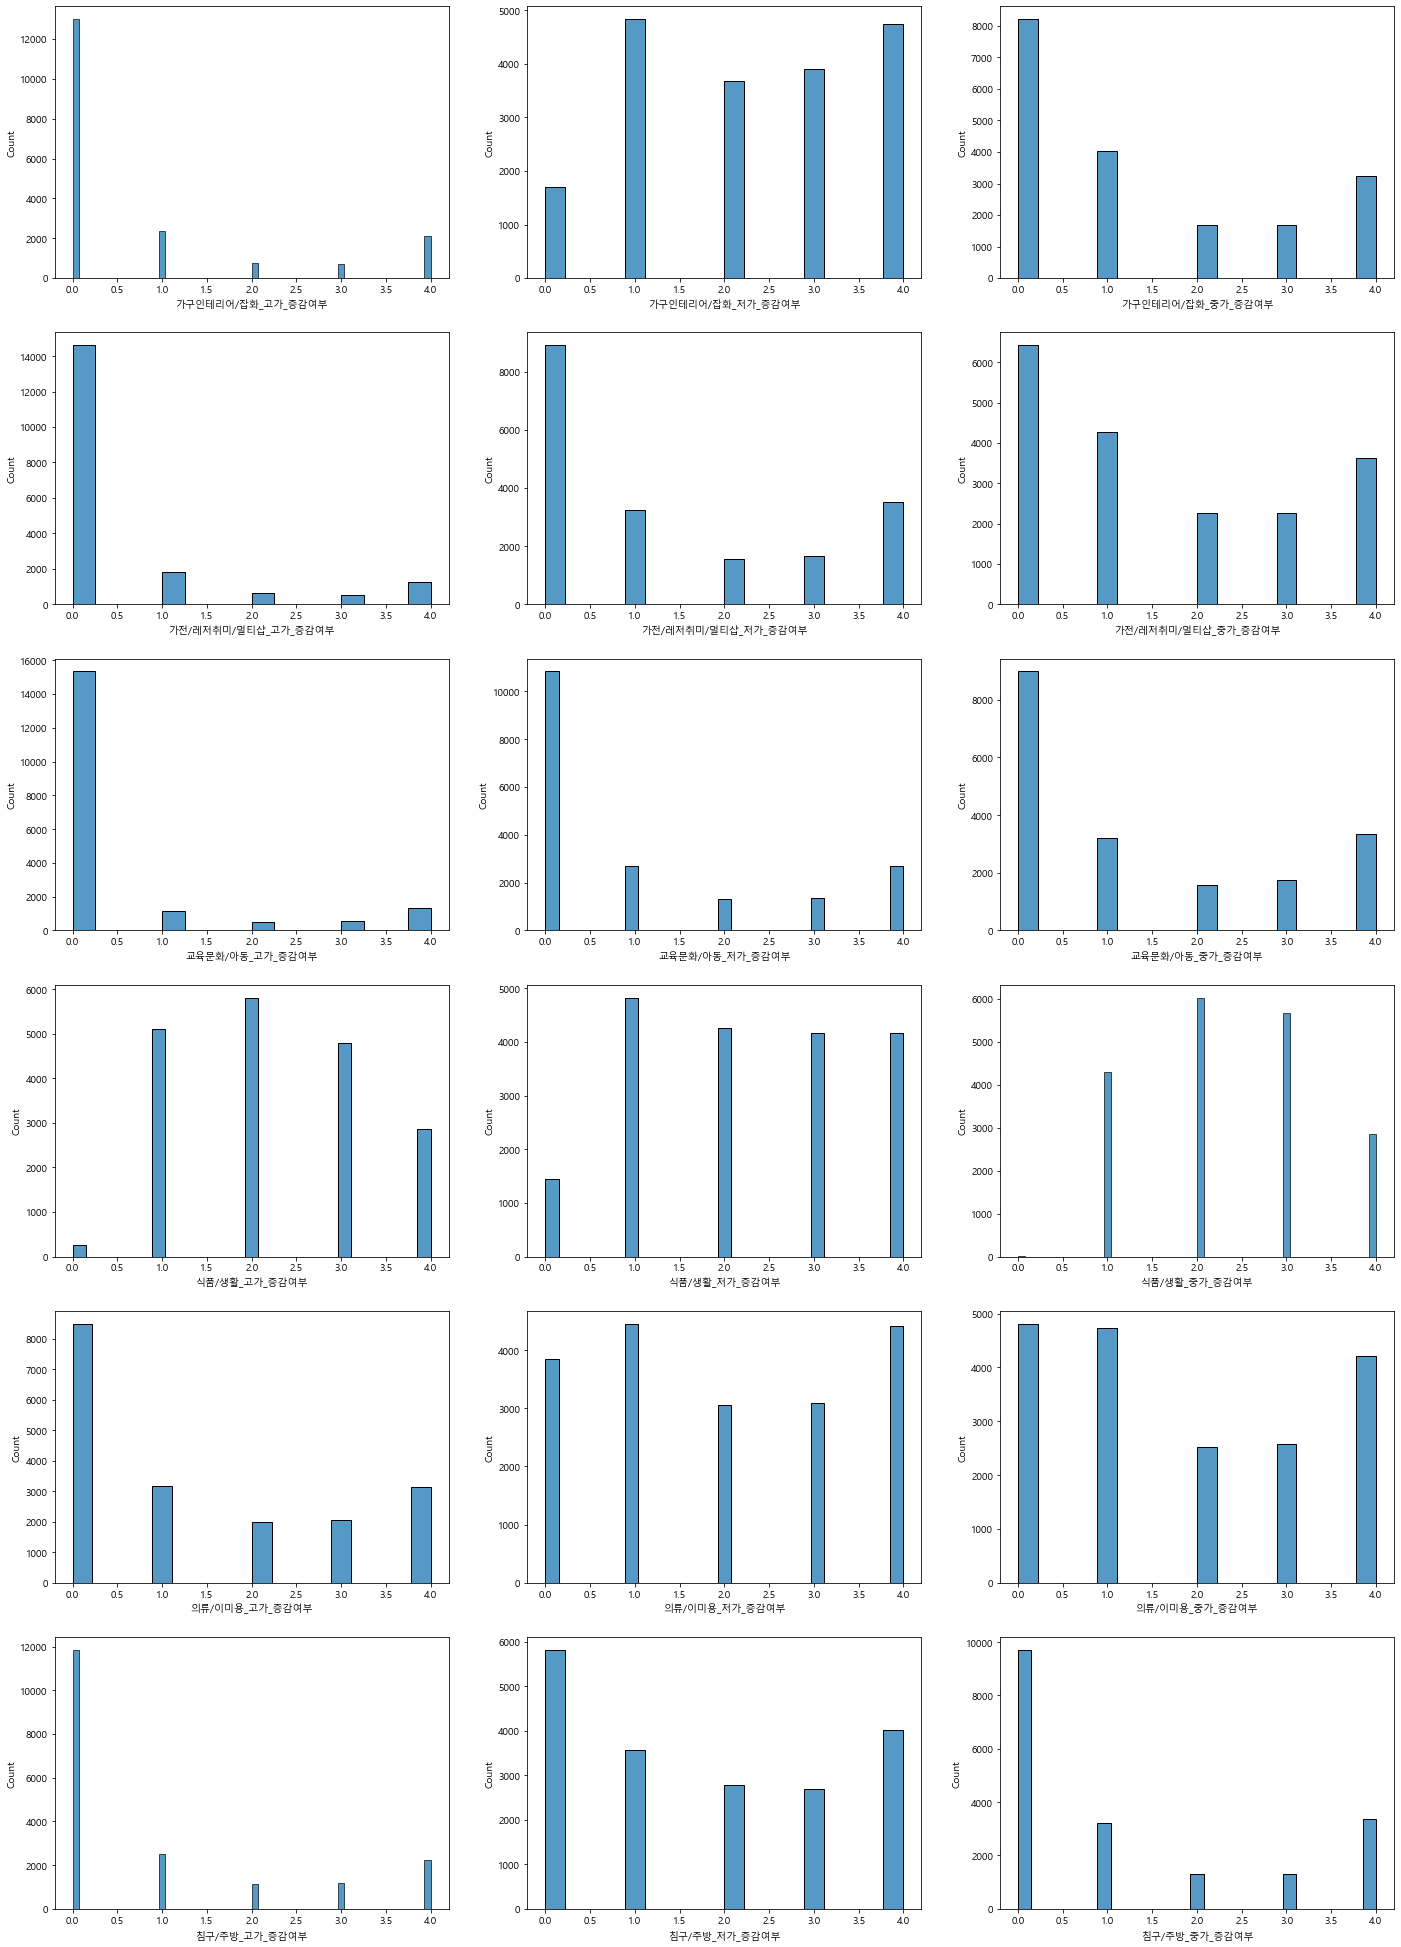

In [324]:
hist_features(q7_q6_df)

## 6분기 대비 8분기 데이터

In [325]:
q8_q6_df, q8_q6_total_ratio, q8_q6_plus_ratio, q8_q6_minus_ratio  = quater_weight_df(6, 8)
q8_q6_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,1,3,4,4,0,1,0,0,0,2,1,1,1,0,2,2,0,4
2,0,2,0,2,0,0,0,0,0,3,1,4,3,1,3,1,0,2
3,0,2,0,0,0,0,0,0,0,0,2,3,0,4,0,0,0,0
4,0,2,1,0,0,1,0,1,0,2,1,2,1,4,2,0,0,4
6,2,2,3,4,4,0,0,4,0,4,3,4,2,3,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,0
19334,0,1,0,0,4,0,4,1,4,1,1,1,0,1,0,0,1,0
19335,0,1,1,0,3,1,1,1,3,1,2,3,1,3,0,0,1,0


### 컬럼별 히스토그램 출력

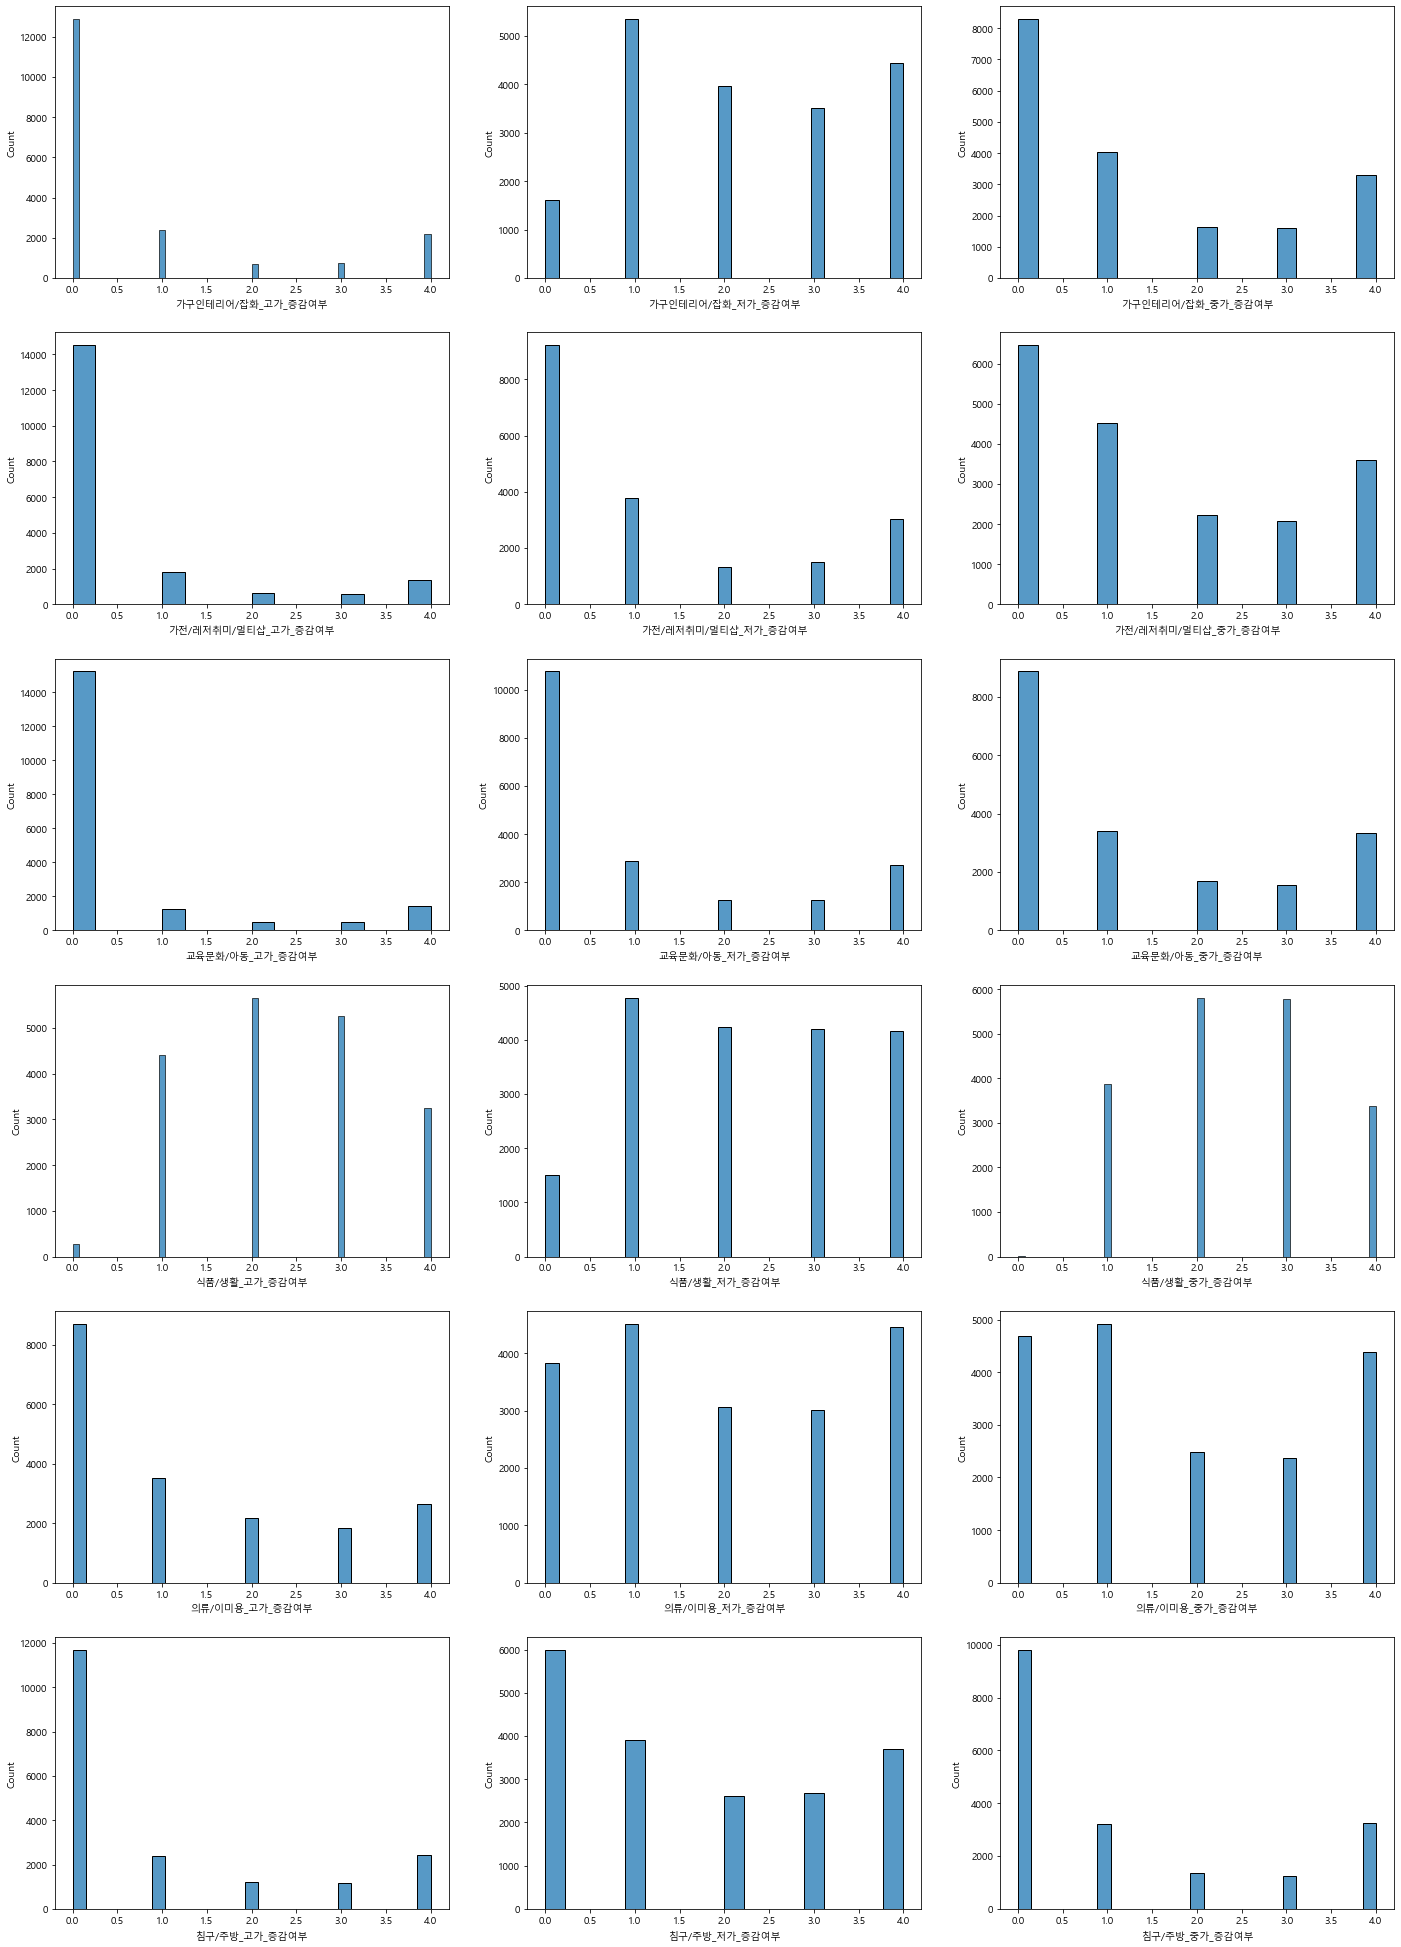

In [326]:
hist_features(q8_q6_df)

## 7분기 대비 8분기 데이터

In [327]:
q8_q7_df, q8_q7_total_ratio, q8_q7_plus_ratio, q8_q7_minus_ratio  = quater_weight_df(7, 8)
q8_q7_df

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,0,4,1,2,0,1,0,0,0,4,4,2,1,0,2,1,0,4
2,0,1,0,1,0,0,0,0,1,2,1,4,3,1,2,1,0,3
3,0,2,0,0,1,0,0,0,0,1,3,2,0,4,0,0,0,0
4,0,3,1,0,1,1,0,0,0,4,2,3,1,2,1,1,0,4
6,1,3,1,4,4,0,0,3,0,2,2,3,3,2,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,4,4,4,0,0,0,0,0,0
19334,0,0,0,0,4,0,4,1,1,4,4,4,0,0,1,0,0,0
19335,0,1,0,0,2,0,1,2,3,2,2,4,0,4,0,0,1,0


### 컬럼별 히스토그램 출력

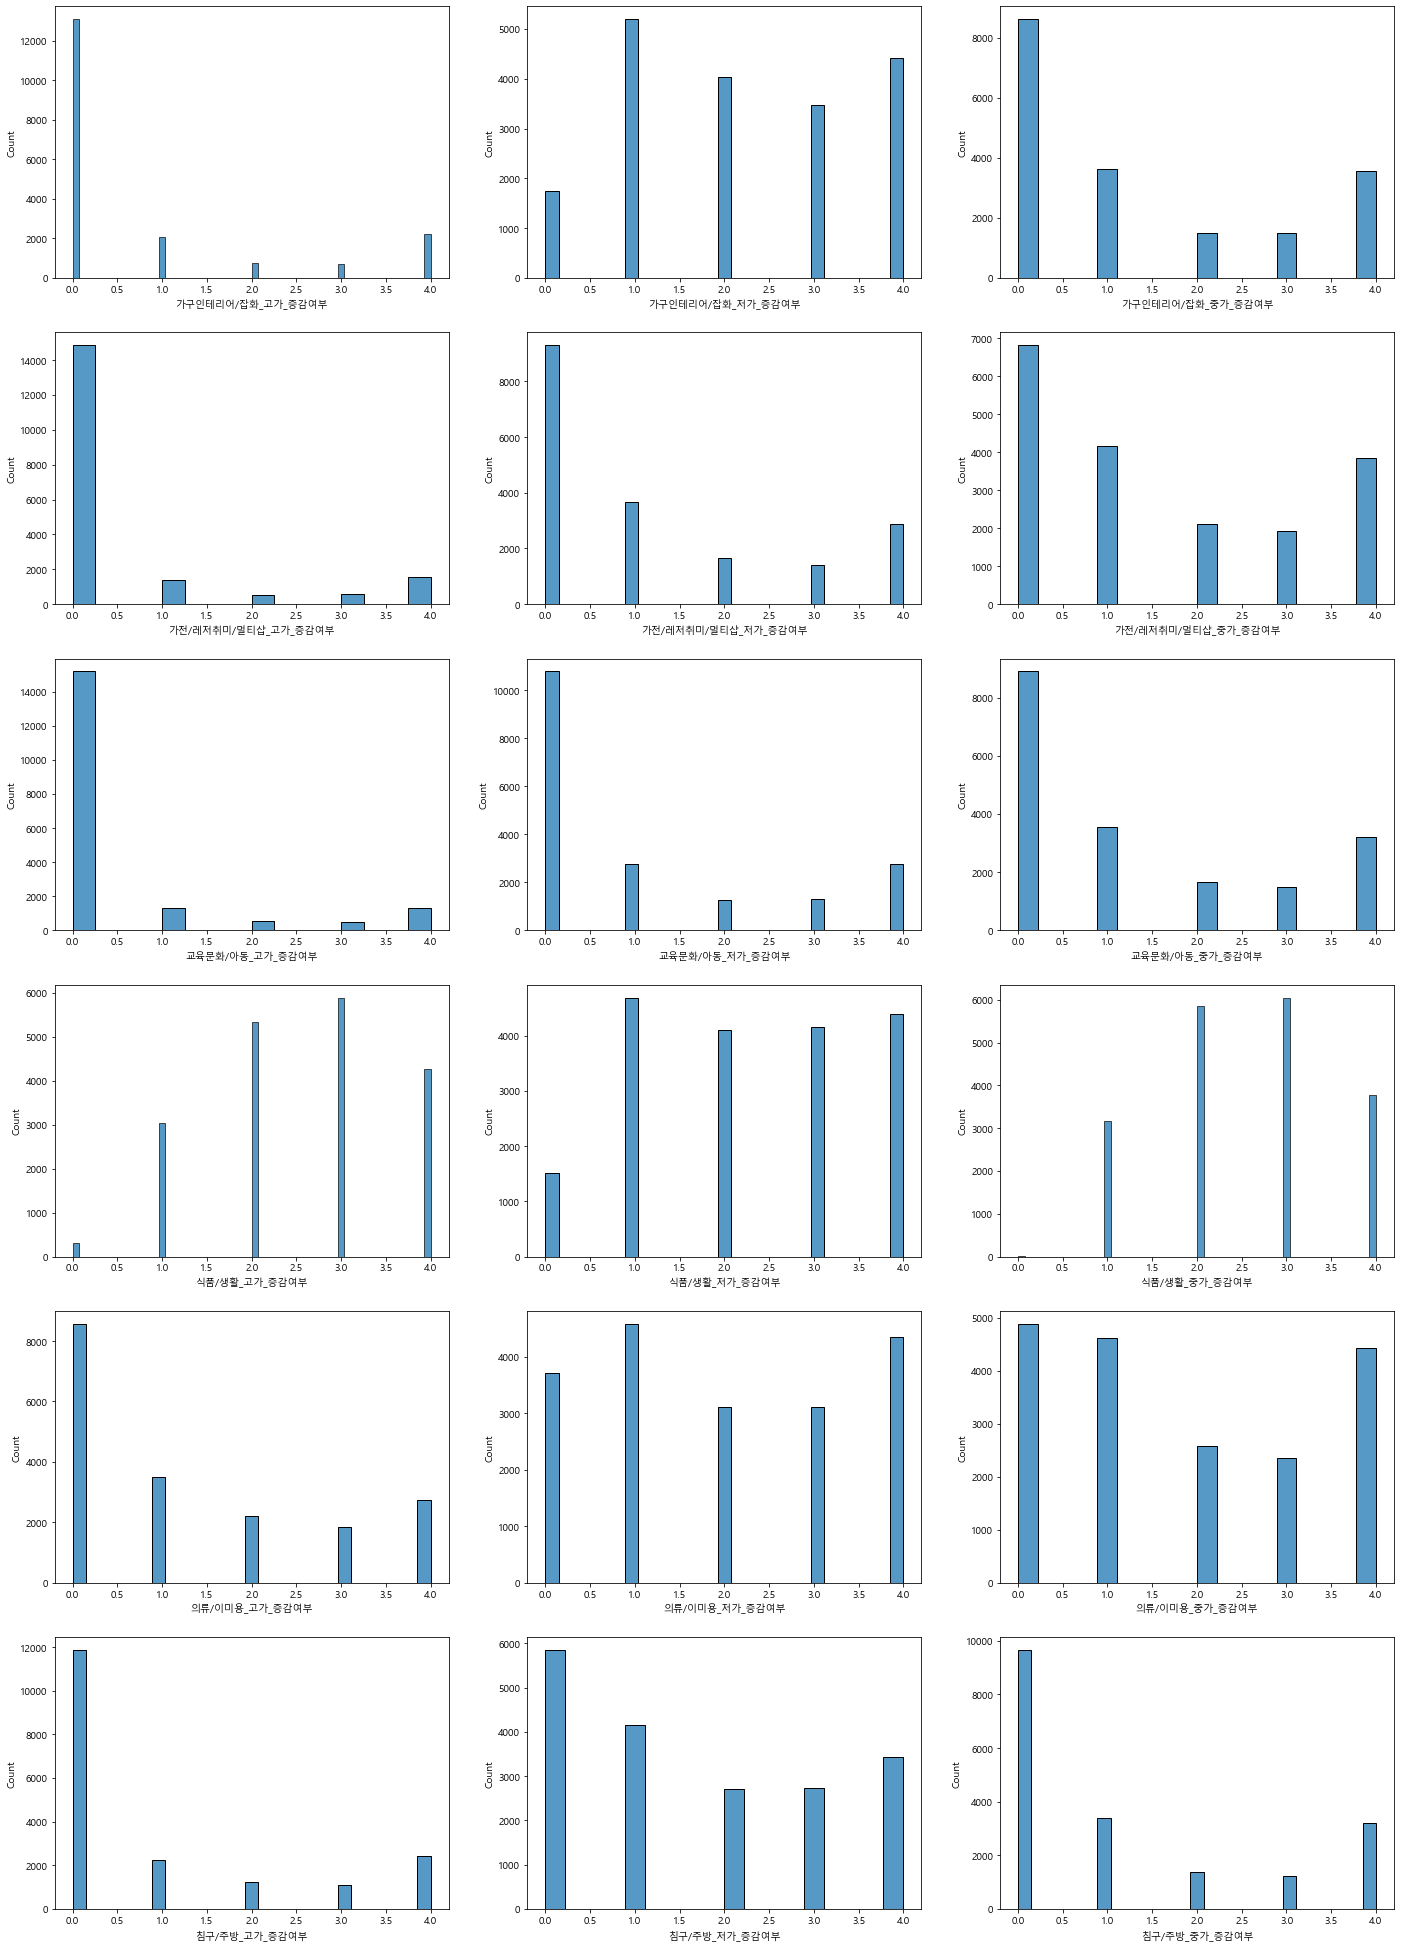

In [328]:
hist_features(q8_q7_df)

### 컬럼별 값 분포 수치 확인

In [263]:
# 1분기대비 2분기
for index_, name in enumerate(q2_q1_df.columns):
    print('---------------------')
    print(name)
    print(q2_q1_df.iloc[:, index_].value_counts())
    
# 4: 짱증가, 3: 보통증가, 2: 감소, 1: 짱감소, 0: 변화없음

---------------------
가구인테리어/잡화_고가_증감여부
0    13524
4     2307
1     1806
2      639
3      590
Name: 가구인테리어/잡화_고가_증감여부, dtype: int64
---------------------
가구인테리어/잡화_저가_증감여부
4    5051
1    4516
3    3985
2    3855
0    1459
Name: 가구인테리어/잡화_저가_증감여부, dtype: int64
---------------------
가구인테리어/잡화_중가_증감여부
0    8533
4    4068
1    3108
2    1623
3    1534
Name: 가구인테리어/잡화_중가_증감여부, dtype: int64
---------------------
가전/레저취미/멀티샵_고가_증감여부
0    14660
4     1887
1     1244
2      555
3      520
Name: 가전/레저취미/멀티샵_고가_증감여부, dtype: int64
---------------------
가전/레저취미/멀티샵_저가_증감여부
0    9034
4    3525
1    3278
2    1590
3    1439
Name: 가전/레저취미/멀티샵_저가_증감여부, dtype: int64
---------------------
가전/레저취미/멀티샵_중가_증감여부
0    6814
4    4531
1    3542
2    2032
3    1947
Name: 가전/레저취미/멀티샵_중가_증감여부, dtype: int64
---------------------
교육문화/아동_고가_증감여부
0    16133
4     1065
1     1021
3      341
2      306
Name: 교육문화/아동_고가_증감여부, dtype: int64
---------------------
교육문화/아동_저가_증감여부
0    10483
1     3209
4     2467
2     1416

In [259]:
q2_q1_df.isnull().sum().sum()

0

In [255]:
q2_q1_minus_ratio

[-0.7597462679779614,
 -0.6301274706449344,
 -0.6887954120787368,
 -0.7509053943122456,
 -0.7512634516443156,
 -0.6654053968454109,
 -0.8315365237127742,
 -0.6723699478476703,
 -0.5380749968440901,
 -0.6110763628875487,
 -0.27083423155355246,
 -0.29571487046987643,
 -0.5907040716929898,
 -0.4946193401837804,
 -0.4899557539023896,
 -0.7748561512853264,
 -0.6215411300741037,
 -0.8303601762233144]

In [256]:
q2_q1_total_ratio

[-0.02551046476930298,
 0.02543793830458639,
 0.027290352314949688,
 0.018760837176155884,
 -0.05230878332265571,
 0.05705728272700874,
 -0.14351507964009386,
 0.00014522791626715815,
 0.05035778971731079,
 0.04513214240509725,
 0.010709257510890769,
 0.029707741141324386,
 0.029405497701557155,
 0.061714912423814584,
 -0.008485950139132227,
 0.03887141418928895,
 0.00796860400572351,
 -0.02517618533369089]

In [257]:
q2_q1_plus_ratio

[4.216505016862112,
 1.8086882236815434,
 2.9162349144795376,
 3.7312067307916386,
 2.012896379033852,
 2.692928484283112,
 3.8366080837397156,
 1.8759173588198013,
 1.5340653616260225,
 1.2174978012923245,
 0.43067559348647716,
 0.5273698177246638,
 1.462263521101643,
 1.3109985918930258,
 1.0500992648732705,
 4.628640086690454,
 1.792560528452032,
 5.409428638697931]

#### 1) 2분기 대비 1분기 각 카테고리 증감율 

In [206]:
# 1분기 가전고가 총 매출
weight_plus_q1.iloc[:, 0].sum()

9587319488.336004

In [207]:
# 2분기 가전고가 총 매출
weight_plus_q2.iloc[:, 0].sum()

9342742512.296757

In [208]:
weight_plus_q2.iloc[:, 0].sum() - weight_plus_q1.iloc[:, 0].sum()

-244576976.0392475

In [209]:
weight_plus_q2.loc[:, '가구인테리어/잡화_고가'].sum()

9342742512.296757

In [210]:
# 증감율
ratio = (weight_plus_q2.iloc[:, 0].sum() - weight_plus_q1.iloc[:, 0].sum())/ weight_plus_q1.iloc[:, 0].sum()
ratio

-0.02551046476930298

In [211]:
1+ratio

0.974489535230697

In [222]:
# 고객별_1분기 가격 * 증감율 가격
cust = weight_plus_q1.iloc[:, 0] * (1+ratio)

In [223]:
print(cust)

CUSTNO
1       0.0000
2       0.0000
3       0.0000
4       0.0000
6       0.0000
         ...  
19333   0.0000
19334   0.0000
19335   0.0000
19336   0.0000
19337   0.0000
Name: 가구인테리어/잡화_고가, Length: 18866, dtype: float64


In [216]:
# 2분기 데이터(연습)
ex_weight_plus_q2 = weight_plus_q2
ex_weight_plus_q2['가구인테리어/잡화_고가']

CUSTNO
1           0.0000
2           0.0000
3           0.0000
4           0.0000
6       39405.9806
           ...    
19333       0.0000
19334       0.0000
19335       0.0000
19336       0.0000
19337       0.0000
Name: 가구인테리어/잡화_고가, Length: 18866, dtype: float64

In [217]:
weight_plus_q1.iloc[:, 0]

CUSTNO
1       0.0000
2       0.0000
3       0.0000
4       0.0000
6       0.0000
         ...  
19333   0.0000
19334   0.0000
19335   0.0000
19336   0.0000
19337   0.0000
Name: 가구인테리어/잡화_고가, Length: 18866, dtype: float64

In [218]:
cust

CUSTNO
1       0.0000
2       0.0000
3       0.0000
4       0.0000
6       0.0000
         ...  
19333   0.0000
19334   0.0000
19335   0.0000
19336   0.0000
19337   0.0000
Name: 가구인테리어/잡화_고가, Length: 18866, dtype: float64

In [219]:
ex_weight_plus_q2['가구인테리어/잡화_고가_기준금액'] = cust
ex_1 = ex_weight_plus_q2[['가구인테리어/잡화_고가', '가구인테리어/잡화_고가_기준금액']]
ex_1

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_고가_기준금액
CUSTNO,,
1,0.0000,0.0000
2,0.0000,0.0000
3,0.0000,0.0000
4,0.0000,0.0000
6,39405.9806,0.0000
...,...,...
19333,0.0000,0.0000
19334,0.0000,0.0000
19335,0.0000,0.0000


In [220]:
# 증가고객
plus_df = ex_1[ex_1['가구인테리어/잡화_고가'] > ex_1['가구인테리어/잡화_고가_기준금액']]
plus_df

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_고가_기준금액
CUSTNO,,
6,39405.9806,0.0000
10,360716.2841,0.0000
11,5506692.7716,807807.6463
17,6313747.4627,0.0000
18,443317.2819,0.0000
...,...,...
19300,2048403.7049,0.0000
19304,735578.3047,0.0000
19306,39405.9806,0.0000


In [221]:
# 감소고객 (실제 2분기 데이터, 기준값)
minus_df = ex_1[ex_1['가구인테리어/잡화_고가'] < ex_1['가구인테리어/잡화_고가_기준금액']]
minus_df

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_고가_기준금액
CUSTNO,,
27,737801.2062,2221332.9878
44,403153.4939,2917019.3623
46,11177405.3594,21282114.8434
50,0.0000,130309.3674
56,6212201.2819,10575157.3243
...,...,...
19211,0.0000,2312439.1133
19267,170051.9625,199903.4042
19314,8280217.0403,51936565.2908


In [189]:
minus_cust = minus_df.index
minus_q1_data = weight_plus_q1.loc[minus_cust]
minus_q1_data.head(30)

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가
CUSTNO,,,,,,,,,,,,,,,,,,
27,2279483.6758,0.0000,0.0000,253744.0779,0.0000,0.0000,0.0000,0.0000,0.0000,3761633.7476,0.0000,362401.3329,7348224.0914,0.0000,185042.3082,0.0000,0.0000,0.0000
44,2993381.9265,0.0000,585059.5084,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,374138.9497,3382.8093,484308.5745,0.0000,0.0000,911960.4559,0.0000,0.0000,0.0000
46,21839244.1109,41527.4959,0.0000,0.0000,0.0000,115148.1176,0.0000,0.0000,0.0000,150674.2750,0.0000,630326.0492,2301024.8429,0.0000,0.0000,290052.1931,0.0000,0.0000
50,133720.6432,183188.1663,423812.2075,0.0000,0.0000,91907.2131,57762.7345,15691.6867,112181.2794,224372.2394,34252.2372,1123189.8677,382013.3404,0.0000,326908.0779,203758.5837,13553.5375,30478.4780
56,10851996.8065,637914.2463,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,998225.7226,767429.3683,0.0000,795857.0584,1572325.0996,0.0000,821361.6858,0.0000,0.0000,103437.6486
68,18897072.6579,0.0000,64685662.5898,809081.2522,0.0000,0.0000,0.0000,0.0000,0.0000,513802.0561,71117.6170,291824.5583,412465.8640,0.0000,1069359.4993,41327.0075,0.0000,244605.5510
70,4245063.8079,0.0000,0.0000,0.0000,0.0000,32537.2662,0.0000,0.0000,0.0000,35978.4609,17979.5797,778287.8976,0.0000,0.0000,83577.4426,0.0000,0.0000,0.0000
73,18506438.3959,262308.4278,783037.2005,4453530.2415,5291.8446,0.0000,0.0000,0.0000,495224.0493,32413.0278,23896.9097,283529.5612,165830.5740,499236.2359,5219858.4731,1048085.7833,0.0000,0.0000
81,543665.0726,64367.6186,50327.6996,0.0000,0.0000,0.0000,0.0000,0.0000,48062.7972,85663.0021,2151.7564,475254.7731,7584688.4395,21054.0521,0.0000,914594.8529,0.0000,103122.3540


In [190]:
# 변동 없는 고객
same_df = ex_1[ex_1['가구인테리어/잡화_고가'] == ex_1['가구인테리어/잡화_고가_기준금액']]
same_df

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_고가_기준금액
CUSTNO,,
1,0.0000,0.0000
2,0.0000,0.0000
3,0.0000,0.0000
4,0.0000,0.0000
7,0.0000,0.0000
...,...,...
19333,0.0000,0.0000
19334,0.0000,0.0000
19335,0.0000,0.0000


#### 증가고객의 증증가 추출

In [229]:
# 증가고객의 인덱스
plus_cust = plus_df.index

# 가구고가 컬럼명
i = weight_plus_q1.columns[0]

# 증가고객의 1분기 매출
weight_plus_q1.loc[plus_cust, i].sum()

1414589582.0376844

In [230]:
# 증가고객의 2분기 매출
weight_plus_q2.loc[plus_cust, i].sum()

7379213651.50046

In [233]:
# 증가고객의 증감율(= (증가고객의 2분기 매출 - 증가고객의 1분기 매출)/증가고객의 1분기 매출)
plus_ratio = (weight_plus_q2.loc[plus_cust, i].sum() - weight_plus_q1.loc[plus_cust, i].sum())/weight_plus_q1.loc[plus_cust, i].sum()
plus_ratio

4.216505016862112

In [245]:
new_column_name = '증가고객의 기준_' + i
new_plus_df = plus_df.copy()

# 1분기 실제 금액 * 증감율
new_plus_df[new_column_name] = weight_plus_q1.loc[plus_cust, i]*(1+plus_ratio)
new_plus_df

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_고가_기준금액,증가고객의 기준_가구인테리어/잡화_고가
CUSTNO,,,
6,39405.9806,0.0000,0.0000
10,360716.2841,0.0000,0.0000
11,5506692.7716,807807.6463,4324246.1692
17,6313747.4627,0.0000,0.0000
18,443317.2819,0.0000,0.0000
...,...,...,...
19300,2048403.7049,0.0000,0.0000
19304,735578.3047,0.0000,0.0000
19306,39405.9806,0.0000,0.0000


### 다음 기수 감소고객 파악(라벨값 후보)

In [ ]:
# 1분기
weight_plus_q1
# 2분기
weight_plus_q2
# 3분기
weight_plus_q3
# 4분기
weight_plus_q4
# 5분기
weight_plus_q5
# 6분기
weight_plus_q6
# 7분기
weight_plus_q7
# 8분기
weight_plus_q8

### 1분기 대비 3분기 증가or감소 유무 (라벨값)

#### 1분기대비 2분기(X_features)

In [358]:
total_q3_q1 = weight_plus_q3-weight_plus_q1
total_q3_q1['개인별 총 구매액'] = total_q3_q1.sum(axis=1)
total_minus_ = total_q3_q1[total_q3_q1['개인별 총 구매액'] <0]
total_plus_ = total_q3_q1[total_q3_q1['개인별 총 구매액'] >0]

In [359]:
q2_q1_df_ex = q2_q1_df.copy()

In [ ]:
# 감소 : 0, 증가 : 1

In [360]:
q2_q1_df_ex.loc[total_minus_.index, 'TARGET'] = 0

In [362]:
q2_q1_df_ex.loc[total_plus_.index, 'TARGET'] = 1

In [364]:
q2_q1_df_ex['TARGET'] = q2_q1_df_ex['TARGET'].astype(int)

In [366]:
q2_q1_df_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18866 entries, 1 to 19337
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   가구인테리어/잡화_고가_증감여부    18866 non-null  object
 1   가구인테리어/잡화_저가_증감여부    18866 non-null  object
 2   가구인테리어/잡화_중가_증감여부    18866 non-null  object
 3   가전/레저취미/멀티샵_고가_증감여부  18866 non-null  object
 4   가전/레저취미/멀티샵_저가_증감여부  18866 non-null  object
 5   가전/레저취미/멀티샵_중가_증감여부  18866 non-null  object
 6   교육문화/아동_고가_증감여부      18866 non-null  object
 7   교육문화/아동_저가_증감여부      18866 non-null  object
 8   교육문화/아동_중가_증감여부      18866 non-null  object
 9   식품/생활_고가_증감여부        18866 non-null  object
 10  식품/생활_저가_증감여부        18866 non-null  object
 11  식품/생활_중가_증감여부        18866 non-null  object
 12  의류/이미용_고가_증감여부       18866 non-null  object
 13  의류/이미용_저가_증감여부       18866 non-null  object
 14  의류/이미용_중가_증감여부       18866 non-null  object
 15  침구/주방_고가_증감여부        18866 non-null  object
 16  침구/주

In [368]:
X_features_ohe = pd.get_dummies(q2_q1_df_ex.drop('TARGET', axis=1, inplace = False))
X_features_ohe

,가구인테리어/잡화_고가_증감여부_0,가구인테리어/잡화_고가_증감여부_1,가구인테리어/잡화_고가_증감여부_2,가구인테리어/잡화_고가_증감여부_3,가구인테리어/잡화_고가_증감여부_4,가구인테리어/잡화_저가_증감여부_0,가구인테리어/잡화_저가_증감여부_1,가구인테리어/잡화_저가_증감여부_2,가구인테리어/잡화_저가_증감여부_3,가구인테리어/잡화_저가_증감여부_4,...,침구/주방_저가_증감여부_0,침구/주방_저가_증감여부_1,침구/주방_저가_증감여부_2,침구/주방_저가_증감여부_3,침구/주방_저가_증감여부_4,침구/주방_중가_증감여부_0,침구/주방_중가_증감여부_1,침구/주방_중가_증감여부_2,침구/주방_중가_증감여부_3,침구/주방_중가_증감여부_4
CUSTNO,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
6,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
19334,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
19335,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, q2_q1_df_ex['TARGET'], test_size = 0.3, random_state = 0)

def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    

In [355]:
total_q3_q2 = weight_plus_q3-weight_plus_q2
total_q3_q2['개인별 총 구매액'] = total_q3_q2.sum(axis=1)
total_q3_q2[total_q3_q2['개인별 총 구매액'] <0]

BBCL_PRICE_TYPE,가구인테리어/잡화_고가,가구인테리어/잡화_저가,가구인테리어/잡화_중가,가전/레저취미/멀티샵_고가,가전/레저취미/멀티샵_저가,가전/레저취미/멀티샵_중가,교육문화/아동_고가,교육문화/아동_저가,교육문화/아동_중가,식품/생활_고가,식품/생활_저가,식품/생활_중가,의류/이미용_고가,의류/이미용_저가,의류/이미용_중가,침구/주방_고가,침구/주방_저가,침구/주방_중가,개인별 총 구매액
CUSTNO,,,,,,,,,,,,,,,,,,,
4,0.0000,79092.5099,-303519.2371,255331.9666,-5053.9696,105414.4263,0.0000,0.0000,0.0000,-54160.1010,-42521.6112,-456317.6754,-369705.0198,46876.8146,-497222.3268,109336.9633,-5983.7546,105947.0832,-1032483.9315
9,270860.3250,-10446.2035,0.0000,0.0000,0.0000,-2416555.5744,0.0000,0.0000,0.0000,-100799.9558,12452.4662,141822.6703,1162906.9694,0.0000,-2985196.4212,0.0000,0.0000,0.0000,-3924955.7240
10,-360716.2841,8826.4207,0.0000,0.0000,-3637.9084,18193.0373,0.0000,0.0000,-14822.9550,-37160.2208,33918.2378,-253249.7386,294289.6229,0.0000,-218119.7667,0.0000,-17684.2154,158489.9457,-391673.8248
13,0.0000,-61495.7257,0.0000,0.0000,-37904.7717,0.0000,0.0000,-7374.2707,0.0000,-208224.1540,-15326.1168,107853.0071,-48830.9622,5412.6216,-299116.7740,0.0000,-1277.4118,0.0000,-566284.5583
14,383814.7475,-144243.8371,-10381.1658,-128141.4927,-8747.2550,-22068.3477,0.0000,-20855.2145,-33499.8783,-255229.3995,-59493.7116,-604754.3609,-447377.0596,-89971.8352,1391214.5195,0.0000,-5716.6202,-12879.6063,-68330.5175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19329,0.0000,11277.9962,0.0000,0.0000,-33176.7669,0.0000,0.0000,54221.5714,-35284.2644,-24132.1316,-32527.0244,-245780.8647,0.0000,-137357.6403,0.0000,0.0000,-35408.9435,0.0000,-478168.0683
19332,0.0000,26823.0775,0.0000,0.0000,-81647.9912,0.0000,0.0000,0.0000,0.0000,-821082.0801,-276053.9099,-886736.6899,0.0000,-7431.3644,0.0000,0.0000,-86224.6848,0.0000,-2132353.6428
19333,0.0000,-472.5445,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-25297.8432,-122304.2355,-15184.4480,-223078.4630,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-386337.5341
